In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
cdata=pd.read_csv('C:\\Users\\Akshay N R\\Desktop\\Data Science\\assignments\\decision trees\\Company_Data.csv')
cdata

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# EDA and Visualisation

In [3]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
cdata.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [5]:
cdata_label=cdata.copy()
cdata_label

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [6]:
cdata_label.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [7]:
cdata_label.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
cdata_label.US.unique()

array(['Yes', 'No'], dtype=object)

In [11]:
cdata_label['ShelveLoc'].replace(['Bad','Medium','Good'],[0,1,2],inplace=True)

In [13]:
cdata_label['Urban'].replace(['Yes','No'],[1,0],inplace=True)
cdata_label['US'].replace(['Yes','No'],[1,0],inplace=True)
cdata_label

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          1   59   
3     7.40        117     100            4         466     97          1   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          1   55   
397   7.41        162      26           12         368    159          1   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

In [14]:
def Sales(data):
    data.loc[data['Sales']<=5,'Sales']=1
    data.loc[(data['Sales']>5)&(data['Sales']<=10),'Sales']=2
    data.loc[data['Sales']>10,'Sales']=3
    return data
Sales(cdata_label);

In [15]:
cdata_label

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      2.0        138      73           11         276    120          0   42   
1      3.0        111      48           16         260     83          2   65   
2      3.0        113      35           10         269     80          1   59   
3      2.0        117     100            4         466     97          1   55   
4      1.0        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395    3.0        138     108           17         203    128          2   33   
396    2.0        139      23            3          37    120          1   55   
397    2.0        162      26           12         368    159          1   40   
398    2.0        100      79            7         284     95          0   50   
399    2.0        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

In [16]:
cdata_label.Sales.value_counts()

2.0    245
3.0     78
1.0     77
Name: Sales, dtype: int64

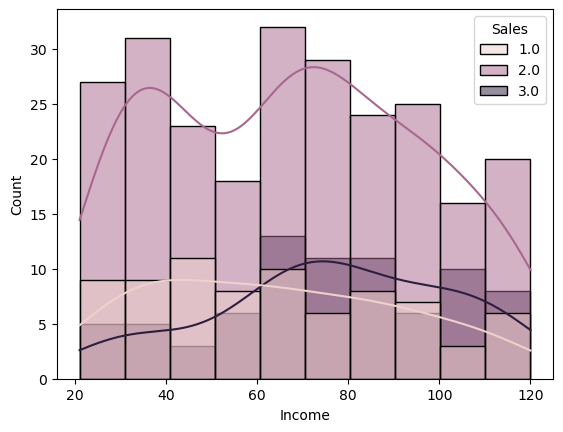

In [126]:
sns.histplot(x='Income', data=cdata_label, kde=True, hue='Sales');

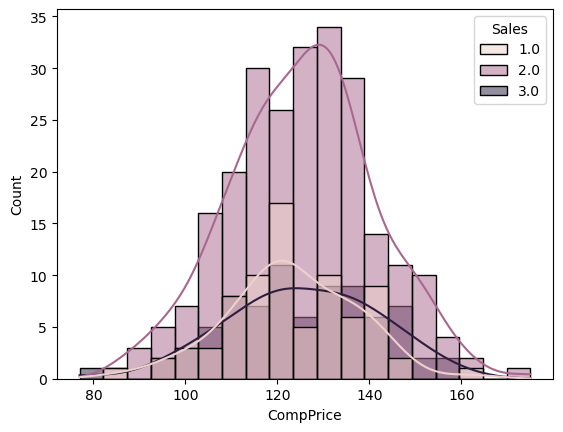

In [125]:
sns.histplot(x='CompPrice', data=cdata_label, kde=True, hue='Sales');

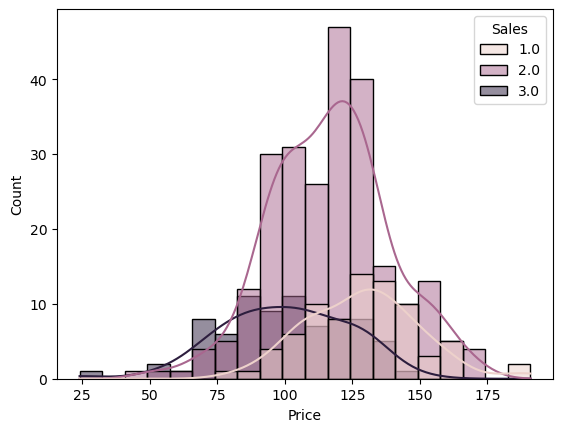

In [131]:
sns.histplot(x='Price', data=cdata_label, kde=True, hue='Sales');

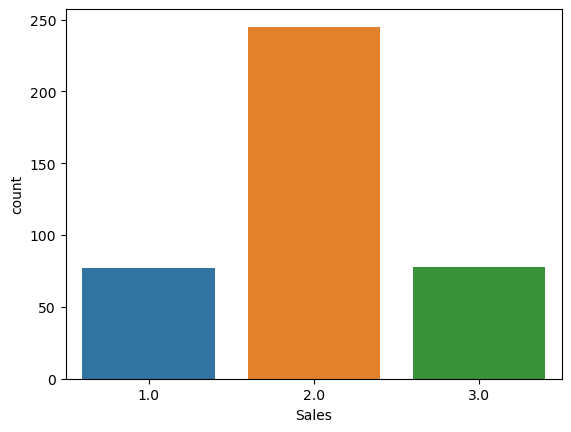

In [127]:
sns.countplot(cdata_label.Sales);

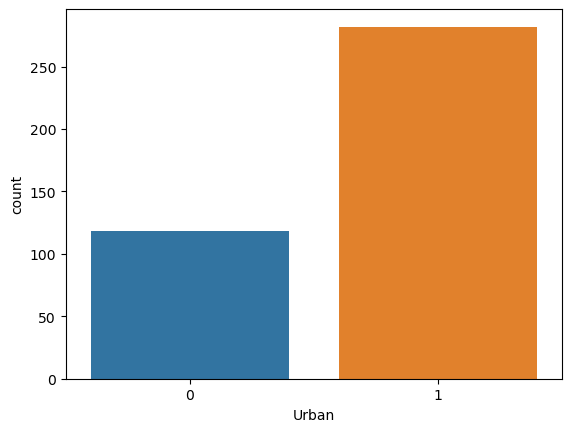

In [128]:
sns.countplot(cdata_label.Urban);

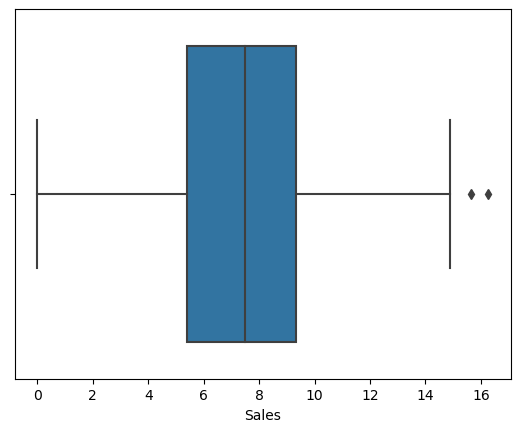

In [129]:
sns.boxplot(cdata.Sales);

In [24]:
cdata.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

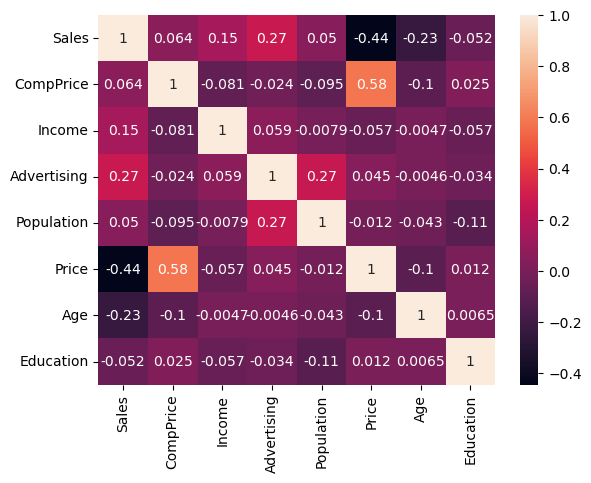

In [130]:
sns.heatmap(cdata.corr(),annot=True);

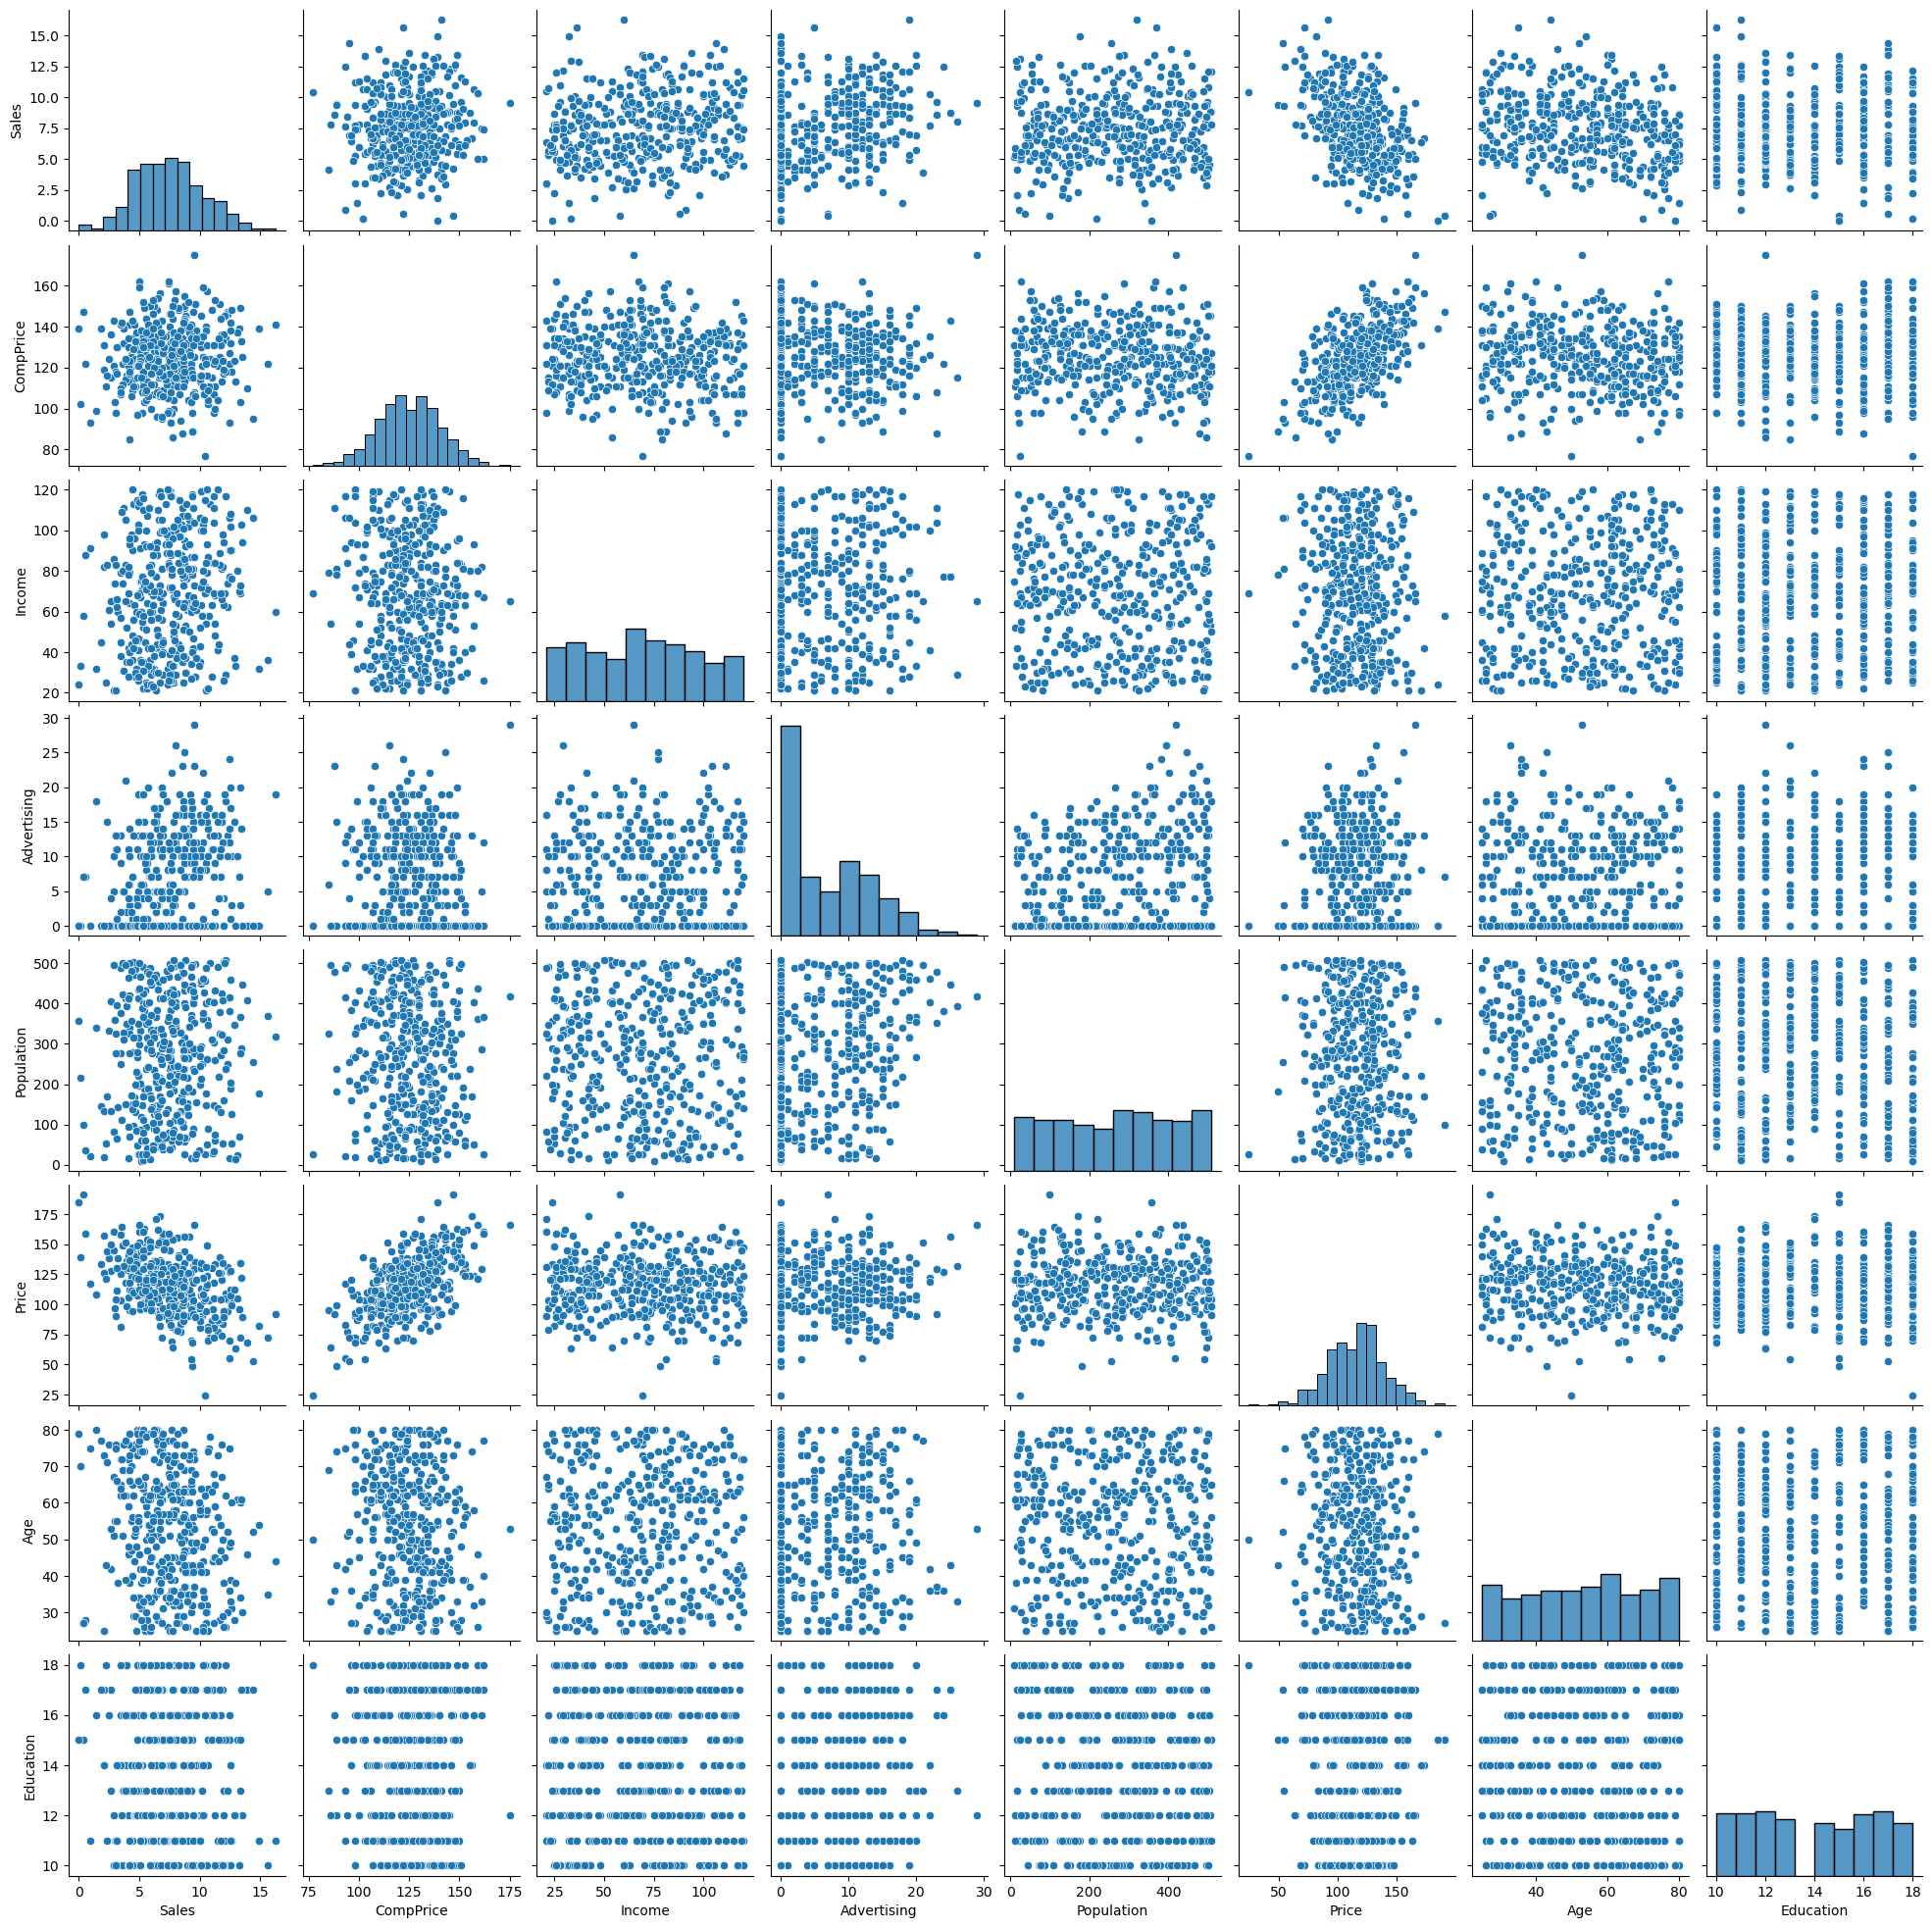

In [28]:
sns.pairplot(cdata)

Text(0, 0.5, 'Price')

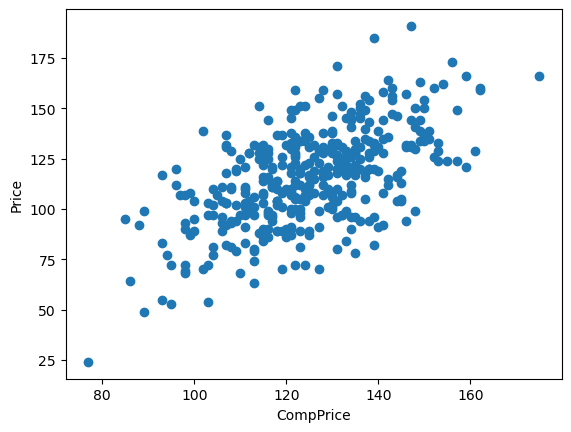

In [31]:
plt.scatter(cdata.CompPrice,cdata.Price)
plt.xlabel('CompPrice')
plt.ylabel('Price')

In [32]:
cdata_label

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      2.0        138      73           11         276    120          0   42   
1      3.0        111      48           16         260     83          2   65   
2      3.0        113      35           10         269     80          1   59   
3      2.0        117     100            4         466     97          1   55   
4      1.0        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395    3.0        138     108           17         203    128          2   33   
396    2.0        139      23            3          37    120          1   55   
397    2.0        162      26           12         368    159          1   40   
398    2.0        100      79            7         284     95          0   50   
399    2.0        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

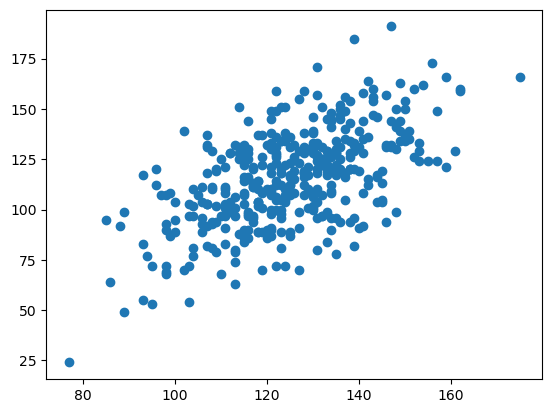

In [33]:
plt.scatter(cdata_label.CompPrice,cdata_label.Price)

In [34]:
cdata_label.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.050355  0.136981     0.247524    0.019513 -0.377851   
CompPrice    0.050355   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.136981  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.247524  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.019513  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.377851   0.584848 -0.056698     0.044537   -0.012144  1.000000   
ShelveLoc    0.484166   0.038549 -0.053465     0.056552   -0.020614  0.050924   
Age         -0.233650  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.005984   0.025197 -0.056855    -0.033594   -0.106378  0.011747   
Urban        0.002598   0.066594  0.037967     0.042035   -0.052025  0.047016   
US           0.154052   0.016869  0.089601     0.684460    0.060564  0.057861   

             ShelveLoc       Age  Education     Urban        US  
Sales         0.484166 -0.233650  -0.005984  0.002598  0.154052  
CompPrice     0.038549 -0.100239   0.025197  0.066594  0.016869  
Income       -0.053465 -0.004670  -0.056855  0.037967  0.089601  
Advertising   0.056552 -0.004557  -0.033594  0.042035  0.684460  
Population   -0.020614 -0.042663  -0.106378 -0.052025  0.060564  
Price         0.050924 -0.102177   0.011747  0.047016  0.057861  
ShelveLoc     1.000000  0.014149  -0.025723 -0.075404  0.047378  
Age           0.014149  1.000000   0.006488  0.028479  0.008652  
Education    -0.025723  0.006488   1.000000 -0.033094 -0.078250  
Urban        -0.075404  0.028479  -0.033094  1.000000  0.047085  
US            0.047378  0.008652  -0.078250  0.047085  1.000000

<AxesSubplot:>

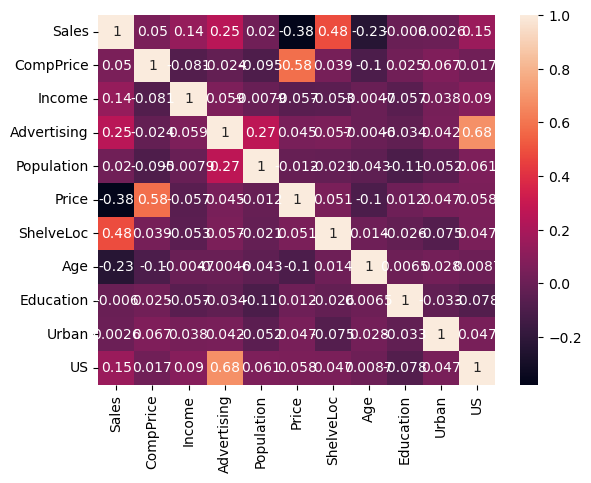

In [35]:
sns.heatmap(cdata_label.corr(),annot=True)

In [36]:
x=cdata_label.iloc[:,1:]
y=cdata_label.iloc[:,0]

In [37]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          2   65   
2          113      35           10         269     80          1   59   
3          117     100            4         466     97          1   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          2   33   
396        139      23            3          37    120          1   55   
397        162      26           12         368    159          1   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [38]:
y

0      2.0
1      3.0
2      3.0
3      2.0
4      1.0
      ... 
395    3.0
396    2.0
397    2.0
398    2.0
399    2.0
Name: Sales, Length: 400, dtype: float64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [40]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(280, 10) (120, 10) (280,) (120,)


# Building Decision Tree classifier using Entropy criteria

For Normal data

In [41]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

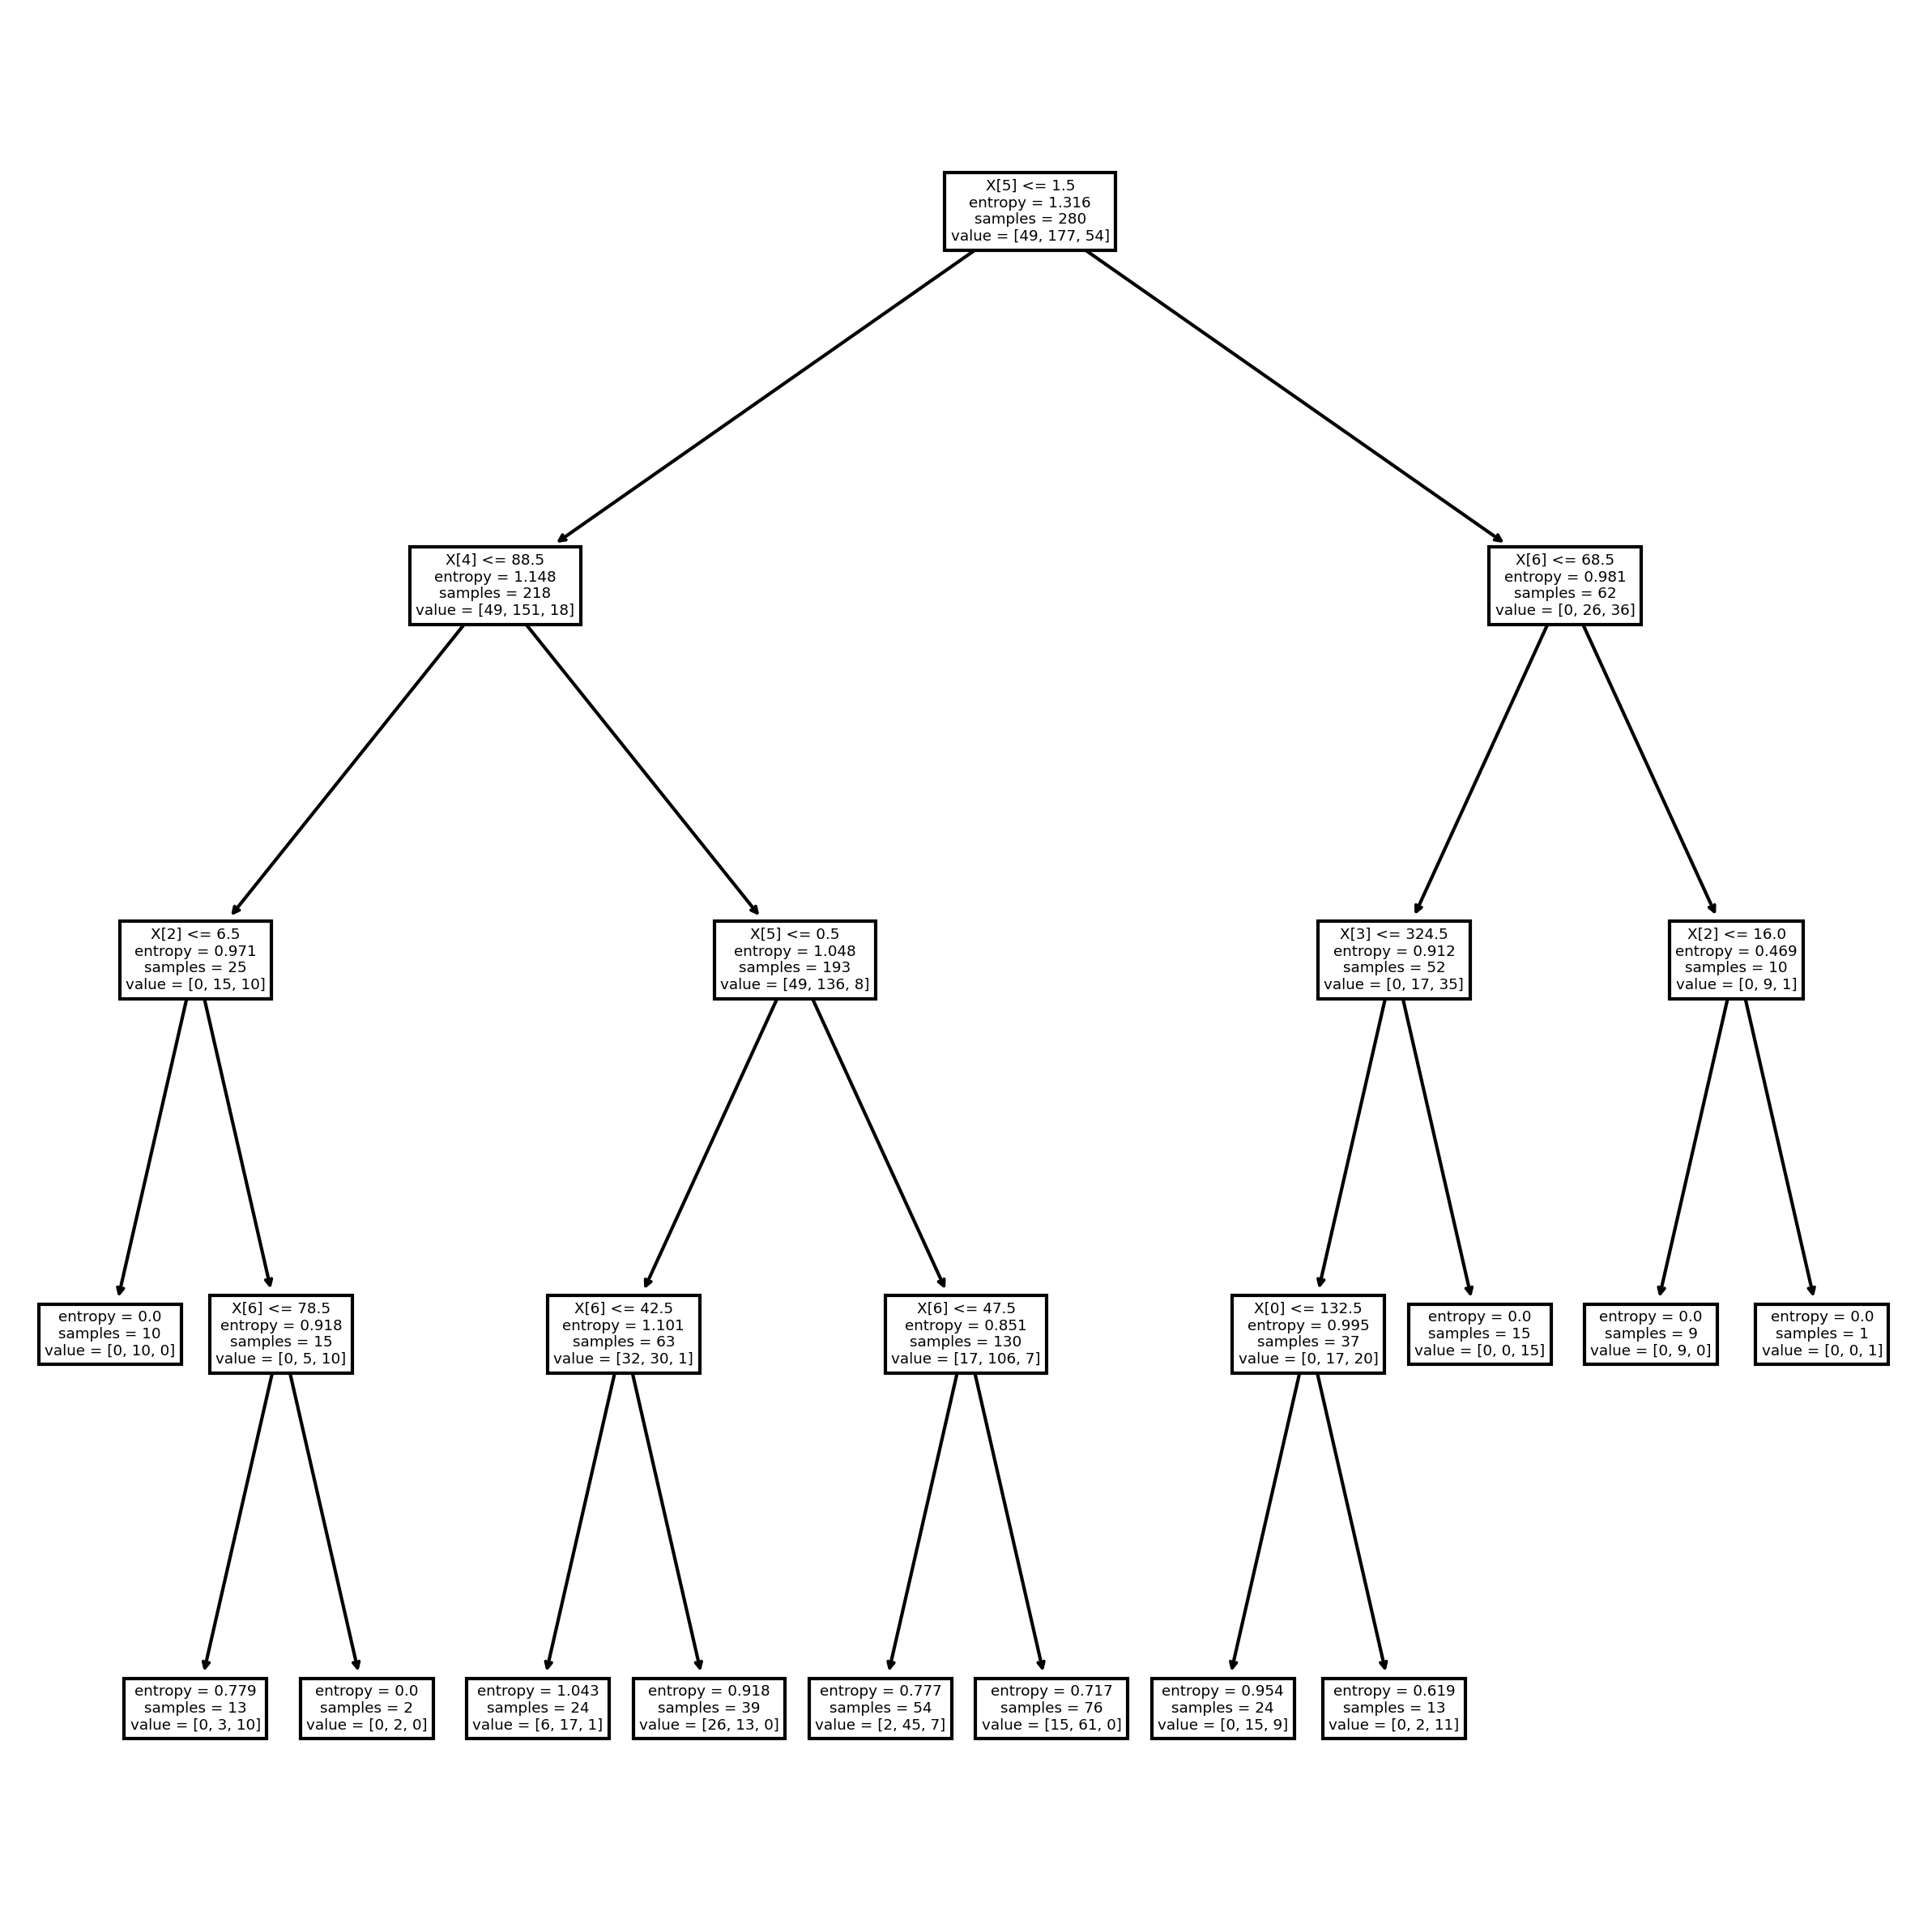

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model);

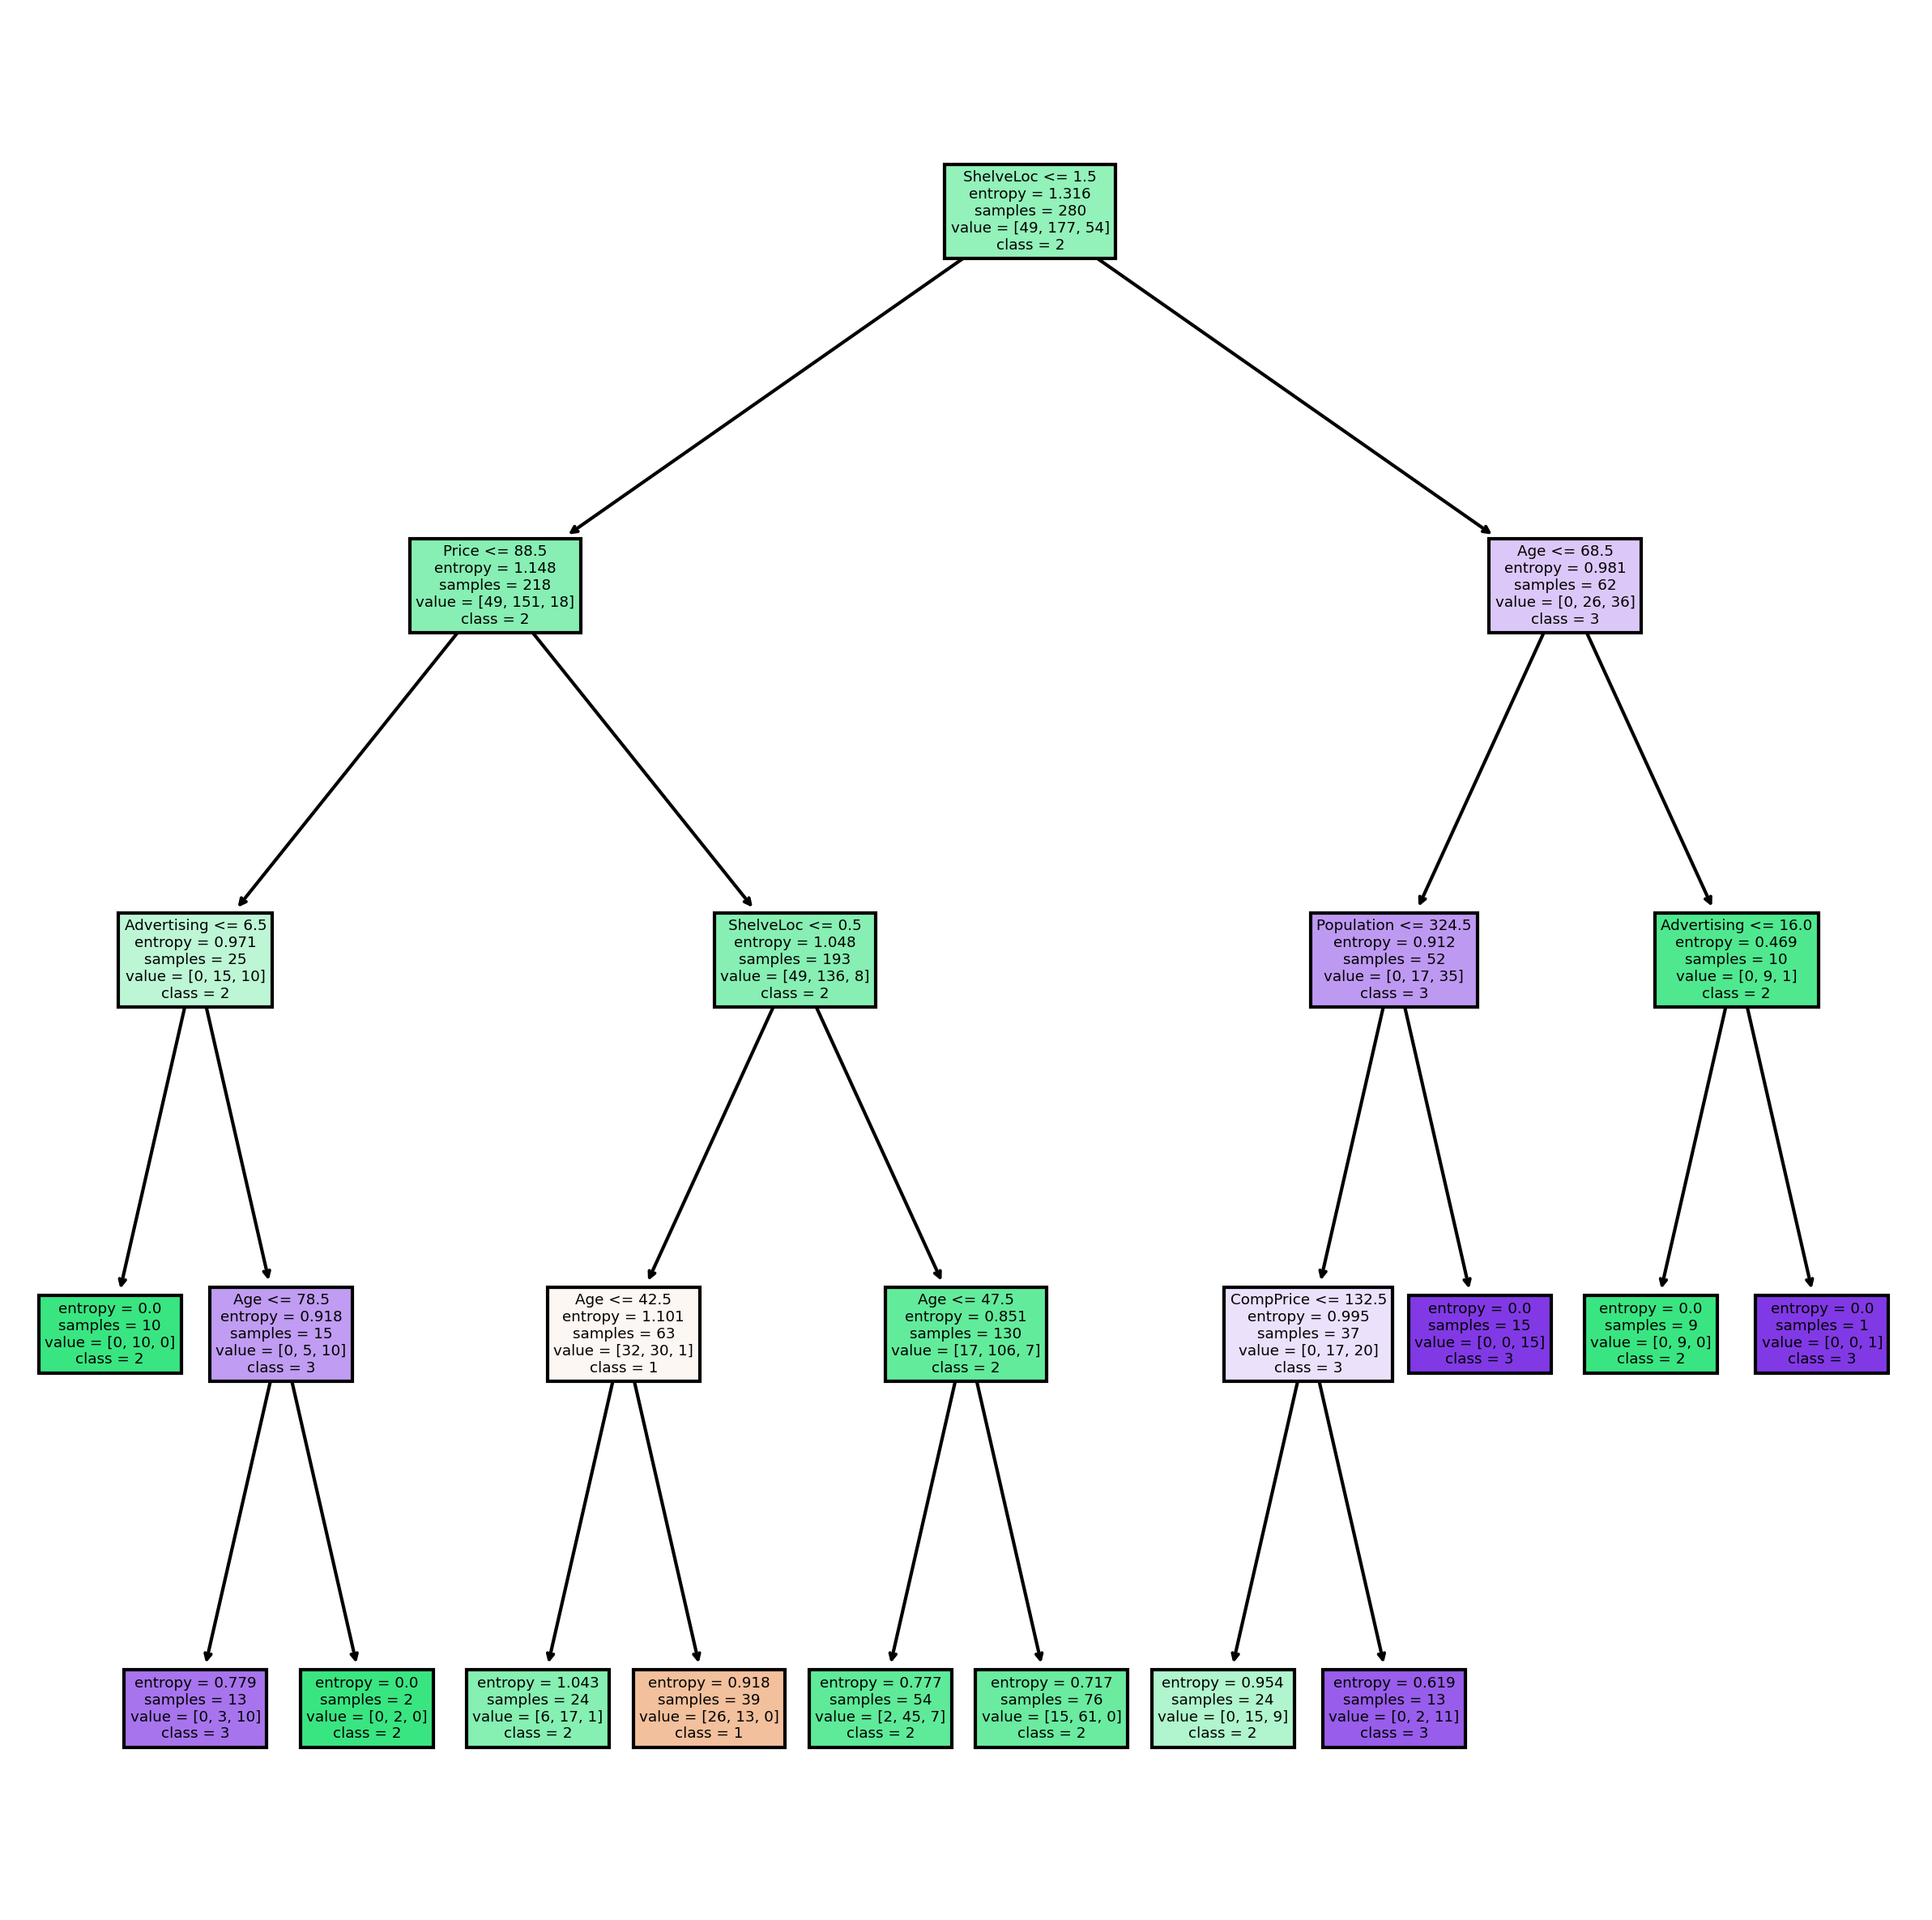

In [45]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)    
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [48]:
y_pred_train= model.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 79.28571428571428
[[ 26  23   0]
 [ 13 159   5]
 [  0  17  37]]


In [49]:
y_pred_test=model.predict(x_test)
acc=accuracy_score(y_test, y_pred_test)*100
print("Accuracy=", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy= 54.166666666666664
[[ 4 24  0]
 [ 7 56  5]
 [ 0 19  5]]


In [52]:
pd.crosstab(y_test,y_pred_test)

col_0  1.0  2.0  3.0
Sales               
1.0      4   24    0
2.0      7   56    5
3.0      0   19    5

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()

In [58]:
xscaled=scaler.fit_transform(x)
xscaled

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.80236876,
         0.64686916,  0.74188112]])

In [60]:
df=pd.DataFrame(xscaled,columns=cdata.columns[1:])
df

CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     0.850455  0.155361     0.657177    0.075819  0.177823  -1.446917   
1    -0.912484 -0.739060     1.409957   -0.032882 -1.386854   1.528747   
2    -0.781896 -1.204159     0.506621    0.028262 -1.513719   0.040915   
3    -0.520720  1.121336    -0.396715    1.366649 -0.794814   0.040915   
4     1.046337 -0.166631    -0.547271    0.510625  0.516132  -1.446917   
..         ...       ...          ...         ...       ...        ...   
395   0.850455  1.407551     1.560513   -0.420131  0.516132   1.528747   
396   0.915749 -1.633482    -0.547271   -1.547909  0.177823   0.040915   
397   2.417512 -1.526151     0.807733    0.700853  1.827078   0.040915   
398  -1.630719  0.370022     0.054953    0.130170 -0.879391  -1.446917   
399   0.589279 -1.132606    -0.998939   -1.615848  0.177823   1.528747   

          Age  Education     Urban        US  
0   -0.699782   1.184449  0.646869  0.741881  
1    0.721723  -1.490113  0.646869  0.741881  
2    0.350895  -0.725953  0.646869  0.741881  
3    0.103677   0.038208  0.646869  0.741881  
4   -0.947000  -0.343872  0.646869 -1.347925  
..        ...        ...       ...       ...  
395 -1.256023   0.038208  0.646869  0.741881  
396  0.103677  -1.108033 -1.545908  0.741881  
397 -0.823391   1.566529  0.646869  0.741881  
398 -0.205346  -0.725953  0.646869  0.741881  
399 -0.267150   0.802369  0.646869  0.741881  

[400 rows x 10 columns]

In [74]:
cols_index = [df.columns.get_loc(col) for col in df]
print(cols_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [75]:
X=df.iloc[:,:]
Y=cdata_label.iloc[:,0]

In [76]:
X

CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     0.850455  0.155361     0.657177    0.075819  0.177823  -1.446917   
1    -0.912484 -0.739060     1.409957   -0.032882 -1.386854   1.528747   
2    -0.781896 -1.204159     0.506621    0.028262 -1.513719   0.040915   
3    -0.520720  1.121336    -0.396715    1.366649 -0.794814   0.040915   
4     1.046337 -0.166631    -0.547271    0.510625  0.516132  -1.446917   
..         ...       ...          ...         ...       ...        ...   
395   0.850455  1.407551     1.560513   -0.420131  0.516132   1.528747   
396   0.915749 -1.633482    -0.547271   -1.547909  0.177823   0.040915   
397   2.417512 -1.526151     0.807733    0.700853  1.827078   0.040915   
398  -1.630719  0.370022     0.054953    0.130170 -0.879391  -1.446917   
399   0.589279 -1.132606    -0.998939   -1.615848  0.177823   1.528747   

          Age  Education     Urban        US  
0   -0.699782   1.184449  0.646869  0.741881  
1    0.721723  -1.490113  0.646869  0.741881  
2    0.350895  -0.725953  0.646869  0.741881  
3    0.103677   0.038208  0.646869  0.741881  
4   -0.947000  -0.343872  0.646869 -1.347925  
..        ...        ...       ...       ...  
395 -1.256023   0.038208  0.646869  0.741881  
396  0.103677  -1.108033 -1.545908  0.741881  
397 -0.823391   1.566529  0.646869  0.741881  
398 -0.205346  -0.725953  0.646869  0.741881  
399 -0.267150   0.802369  0.646869  0.741881  

[400 rows x 10 columns]

In [77]:
Y

0      2.0
1      3.0
2      3.0
3      2.0
4      1.0
      ... 
395    3.0
396    2.0
397    2.0
398    2.0
399    2.0
Name: Sales, Length: 400, dtype: float64

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=40)

In [79]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(300, 10) (100, 10) (300,) (100,)


Now building model on standardised or scaled data

In [100]:
stdmodel=DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
stdmodel.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

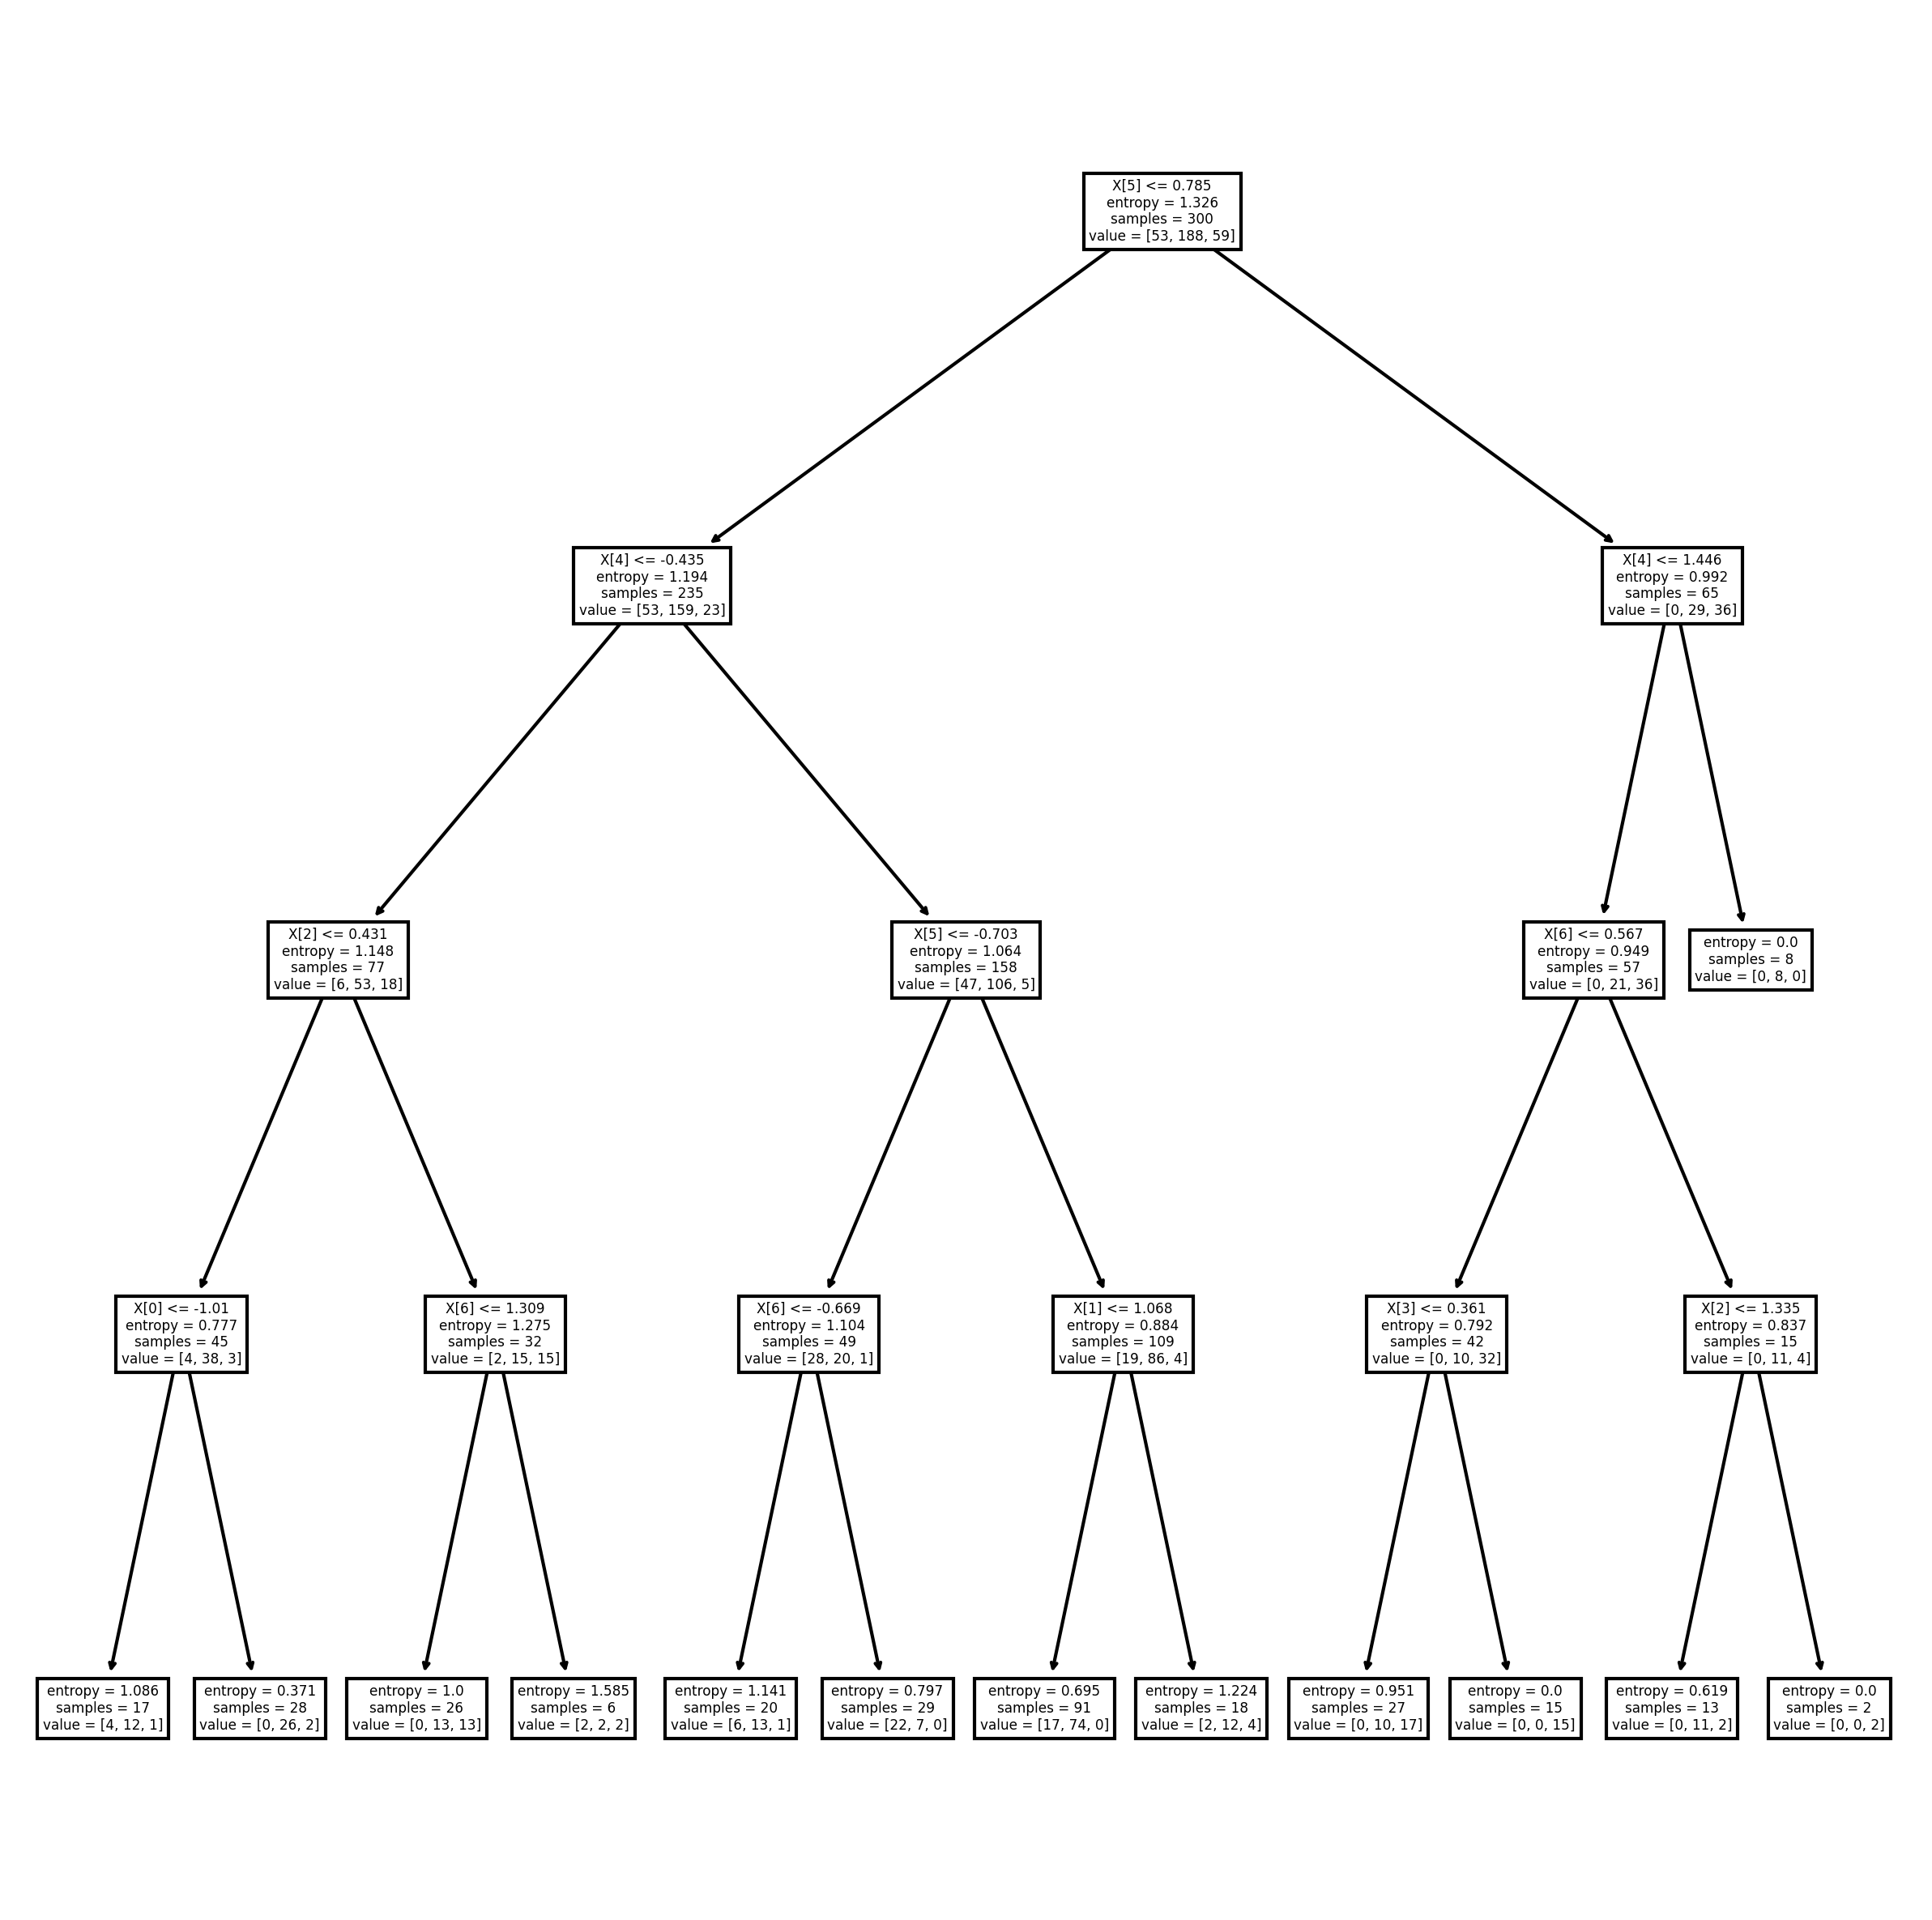

In [101]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(stdmodel);

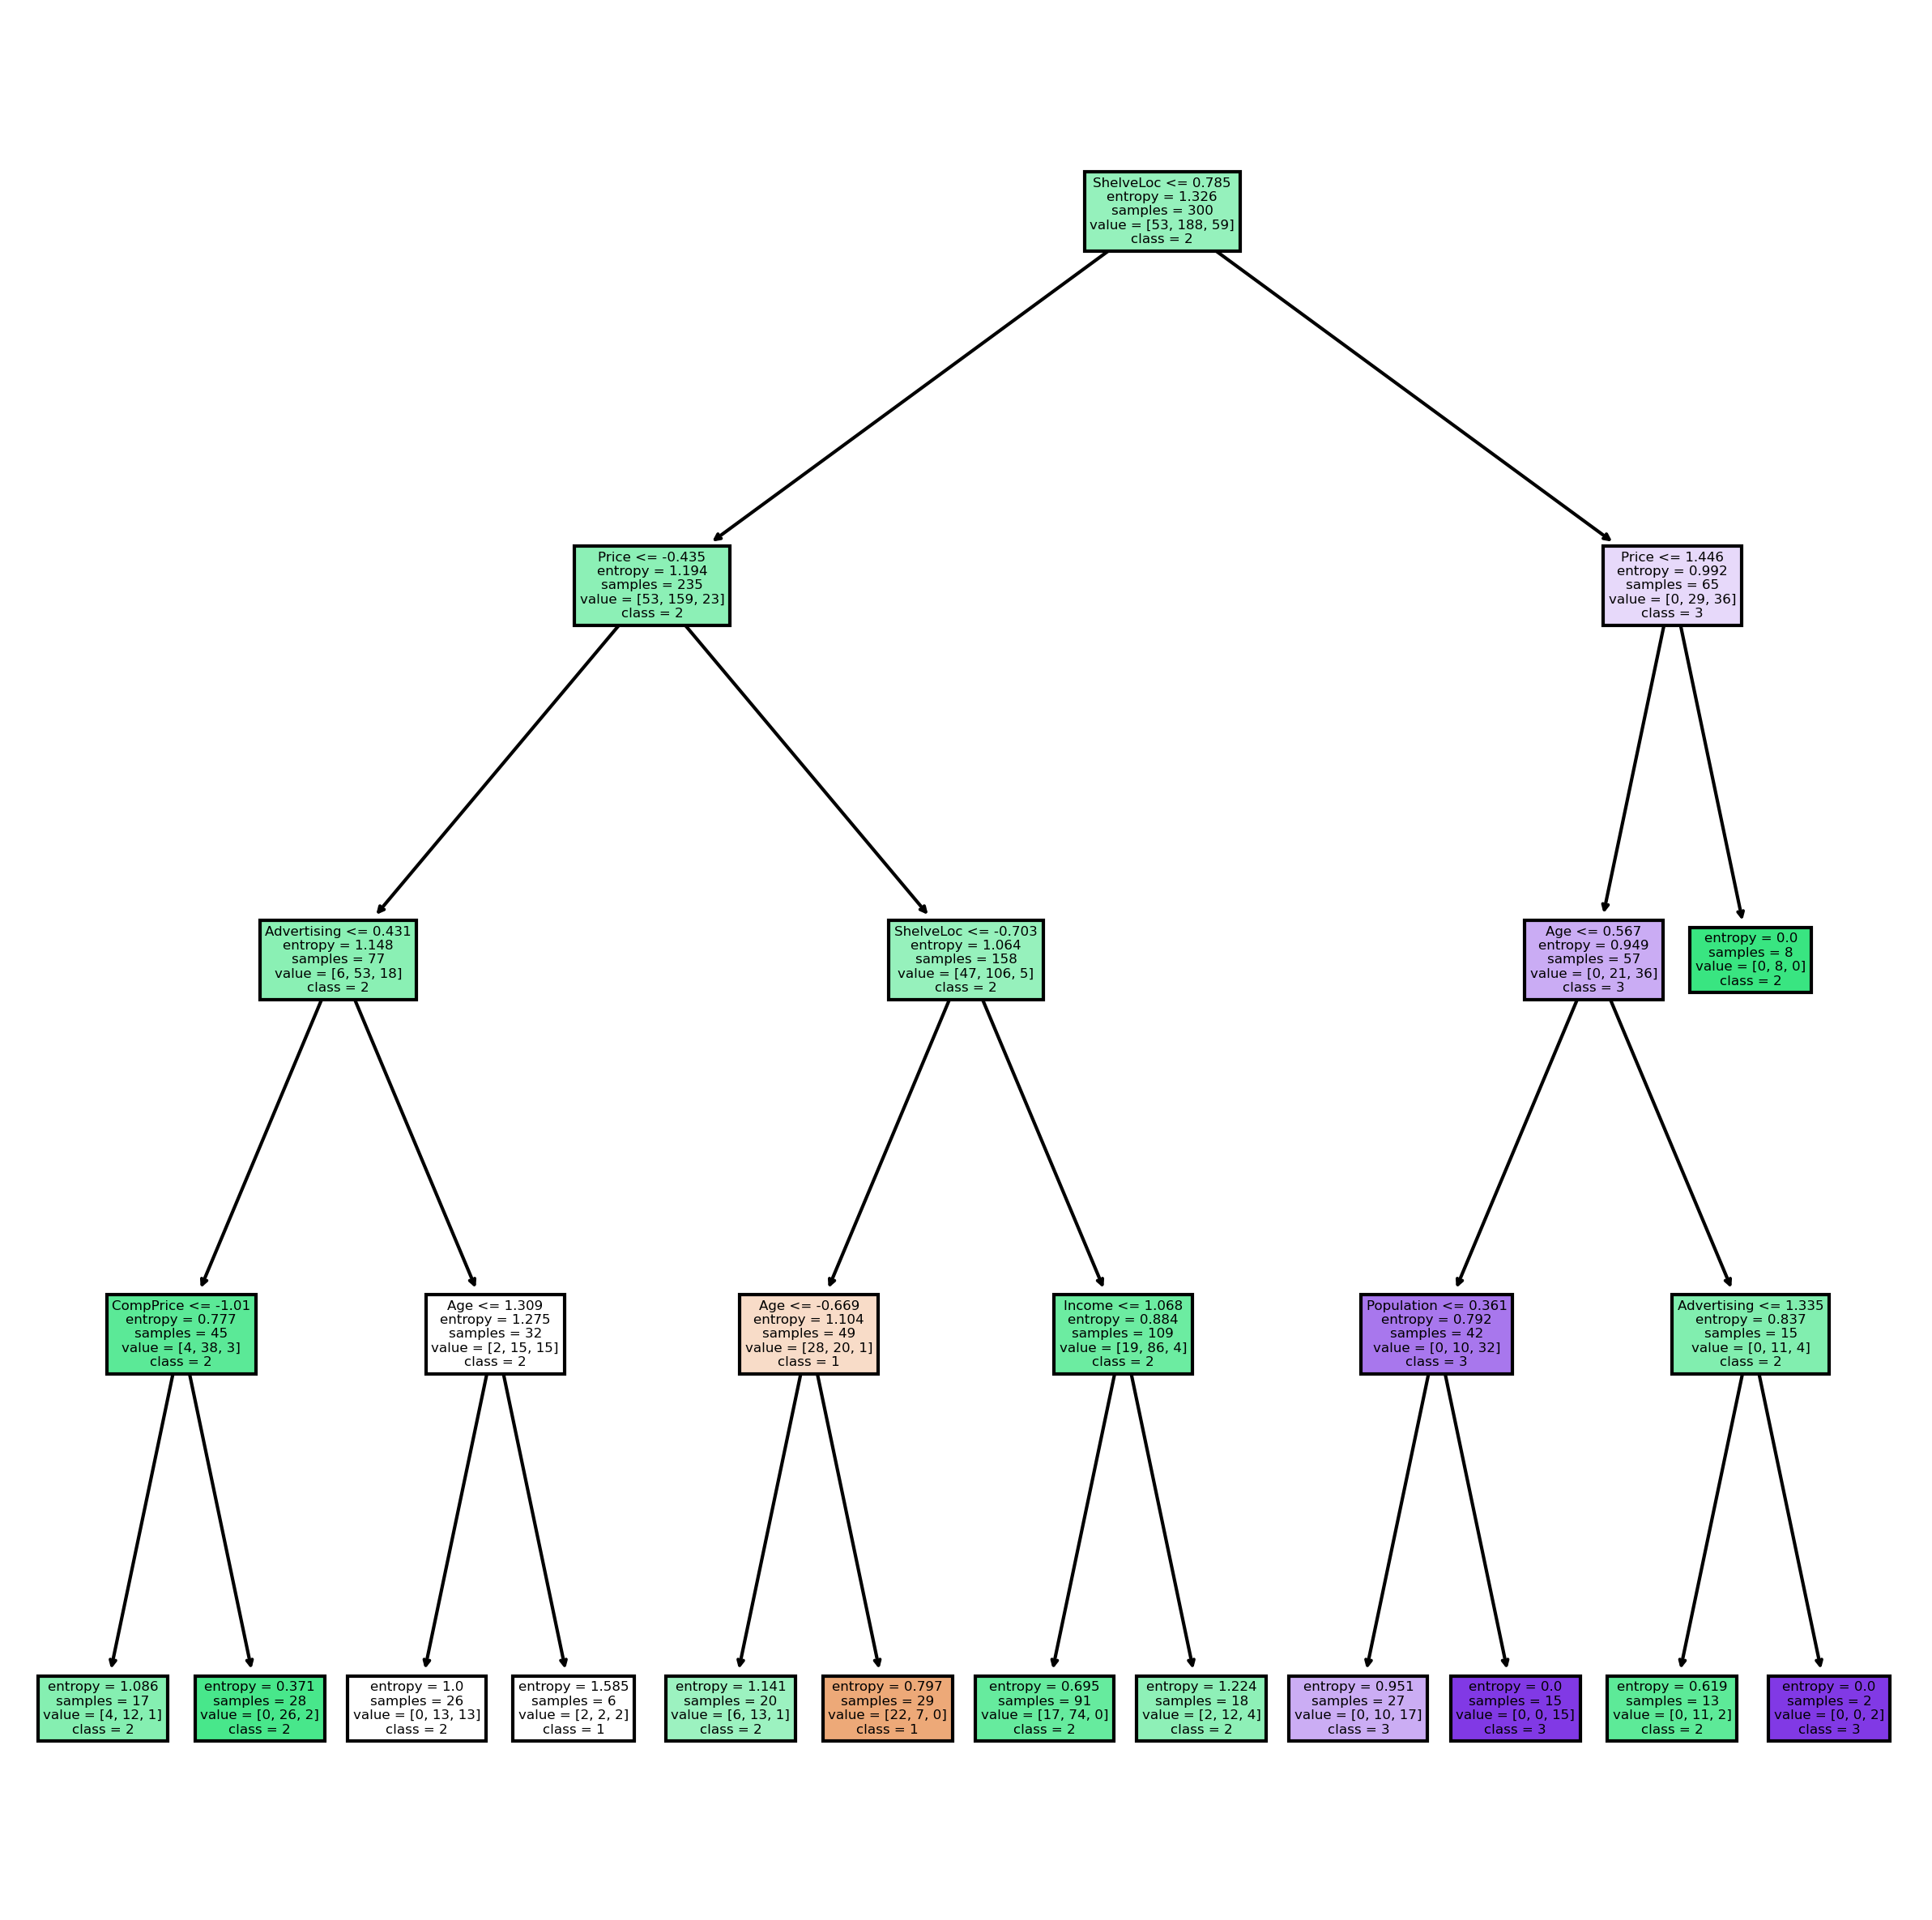

In [102]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)    
tree.plot_tree(stdmodel,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [103]:
Y_pred_train= stdmodel.predict(X_train)
acc = accuracy_score(Y_train, Y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(Y_train, Y_pred_train))

Accuracy = 75.66666666666667
[[ 24  29   0]
 [  9 169  10]
 [  2  23  34]]


In [104]:
Y_pred_test=stdmodel.predict(X_test)
acc=accuracy_score(Y_test, Y_pred_test)*100
print("Accuracy=", acc)
print(confusion_matrix(Y_test, Y_pred_test))

Accuracy= 56.99999999999999
[[ 2 22  0]
 [ 4 47  6]
 [ 0 11  8]]


# Building Decision Tree classifier using gini criteria

For Normal data

In [105]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [106]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

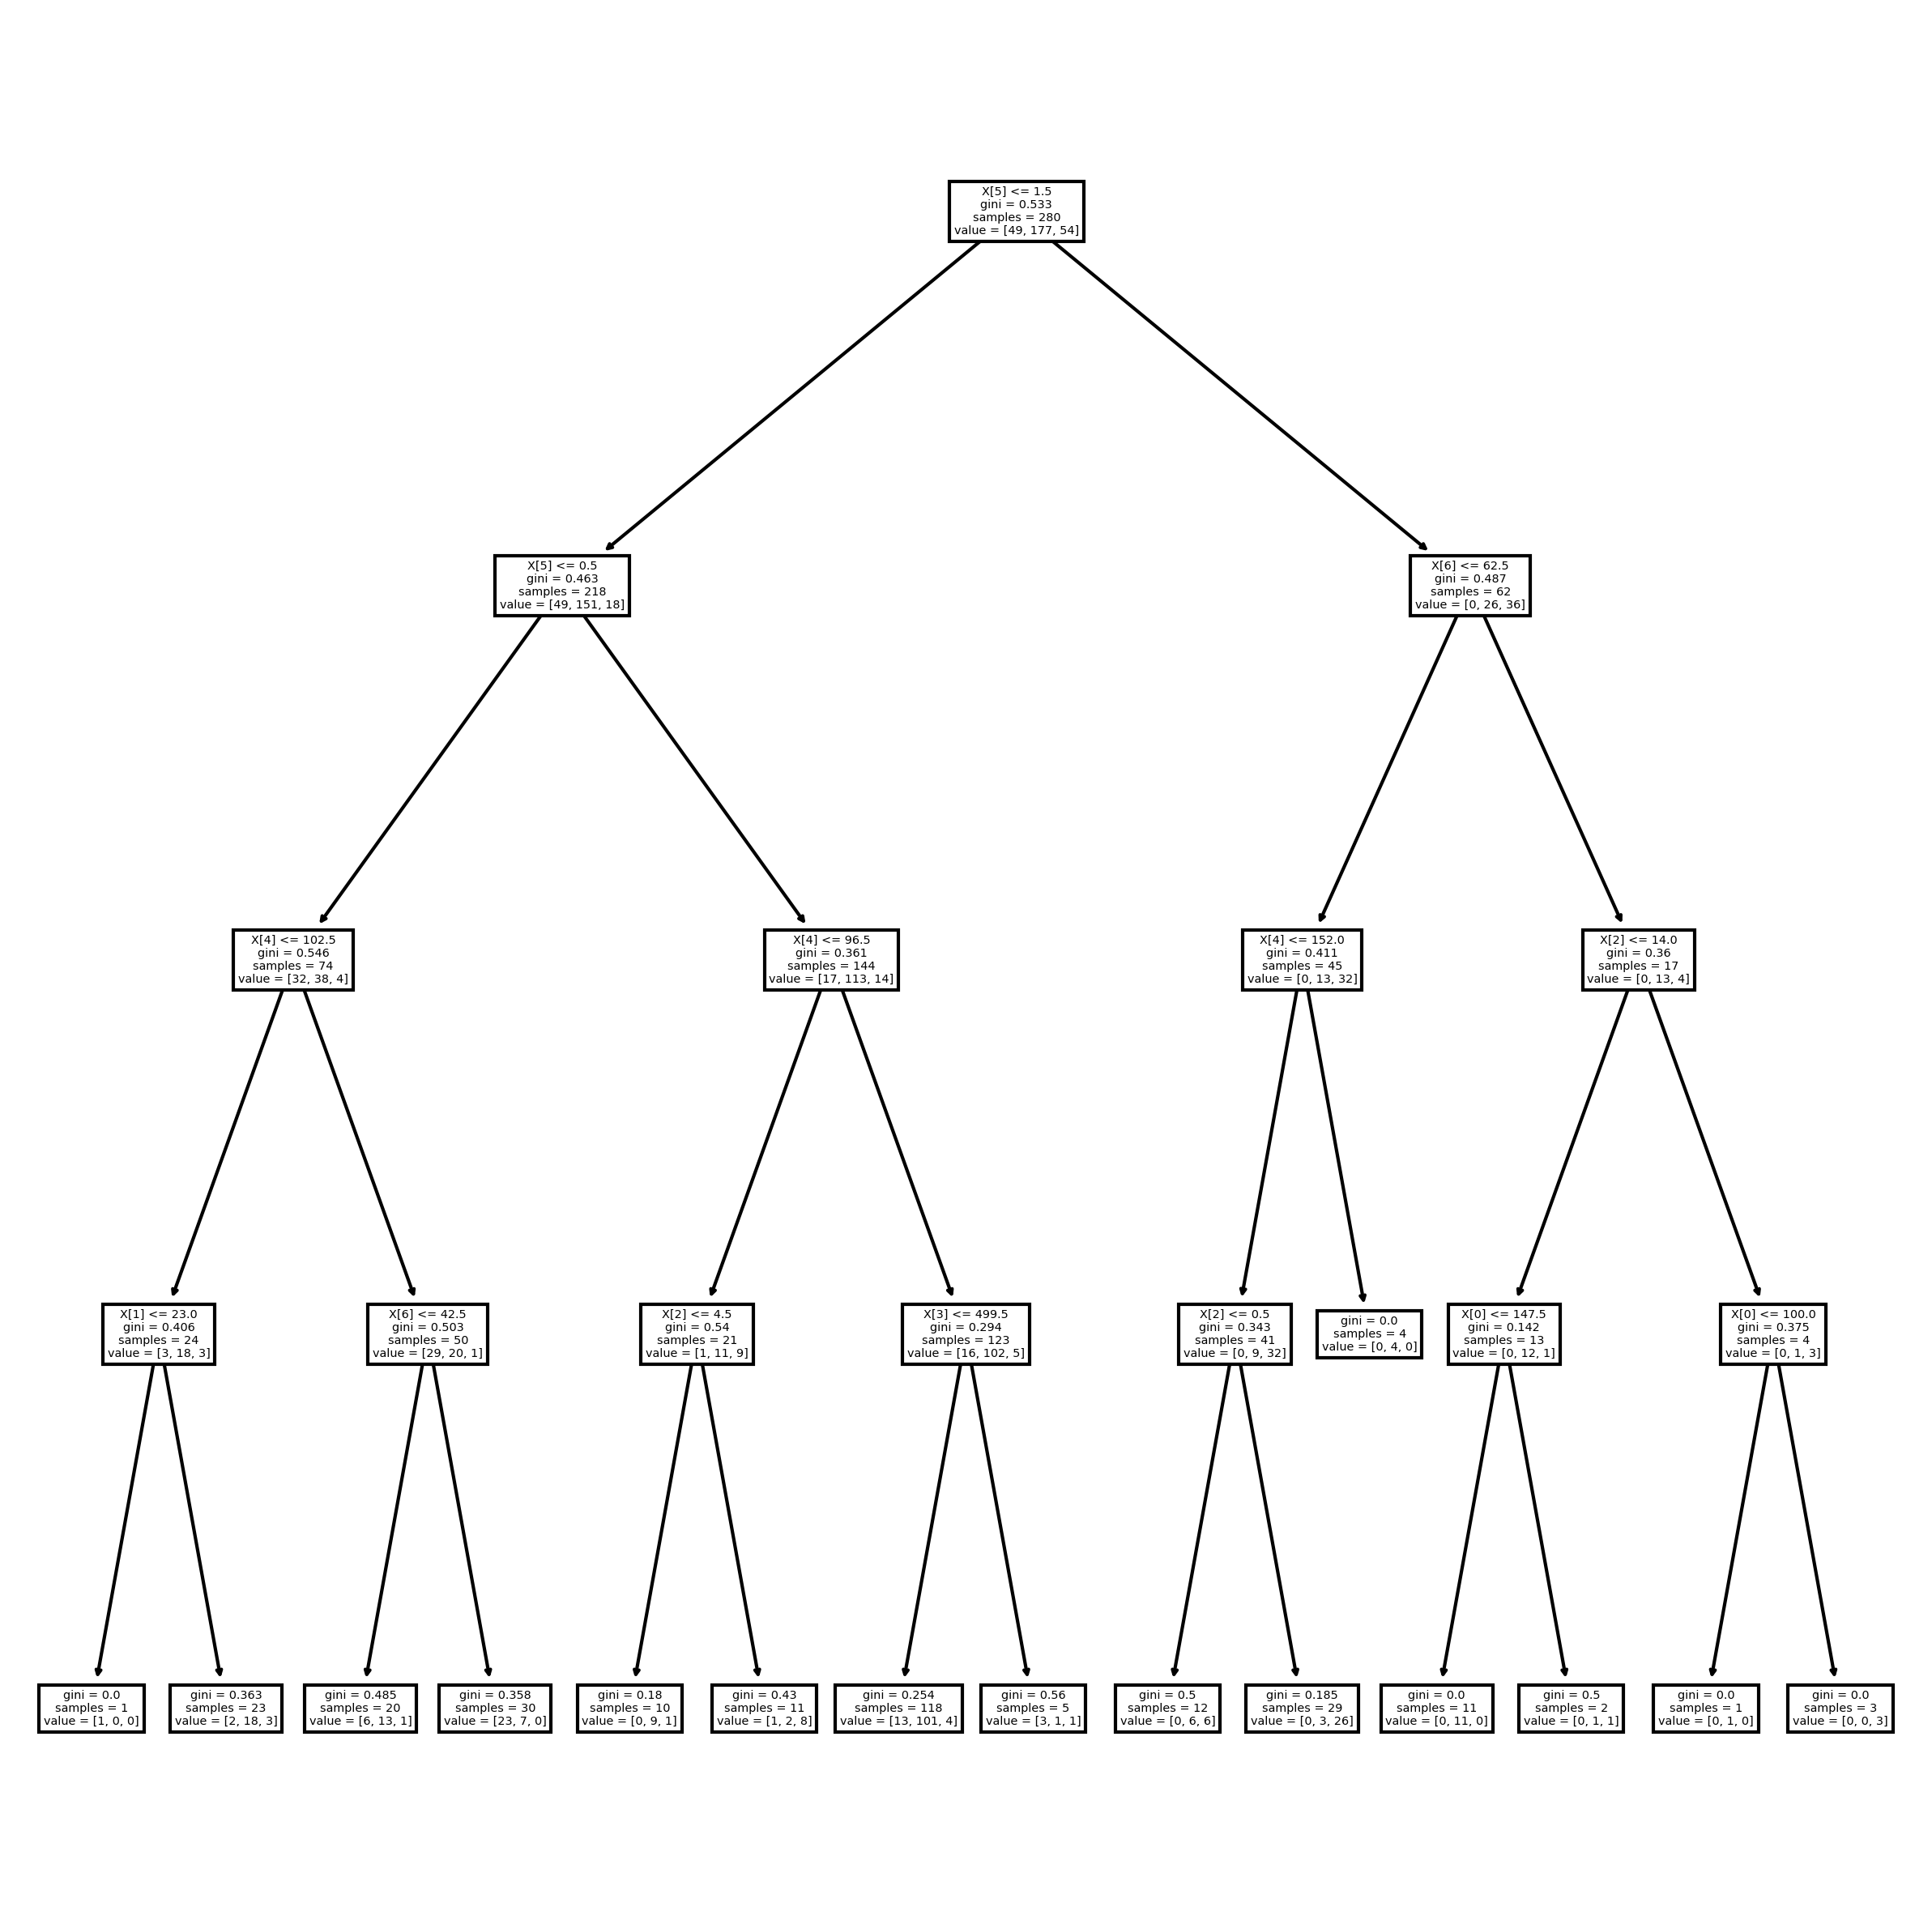

In [107]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model_gini);

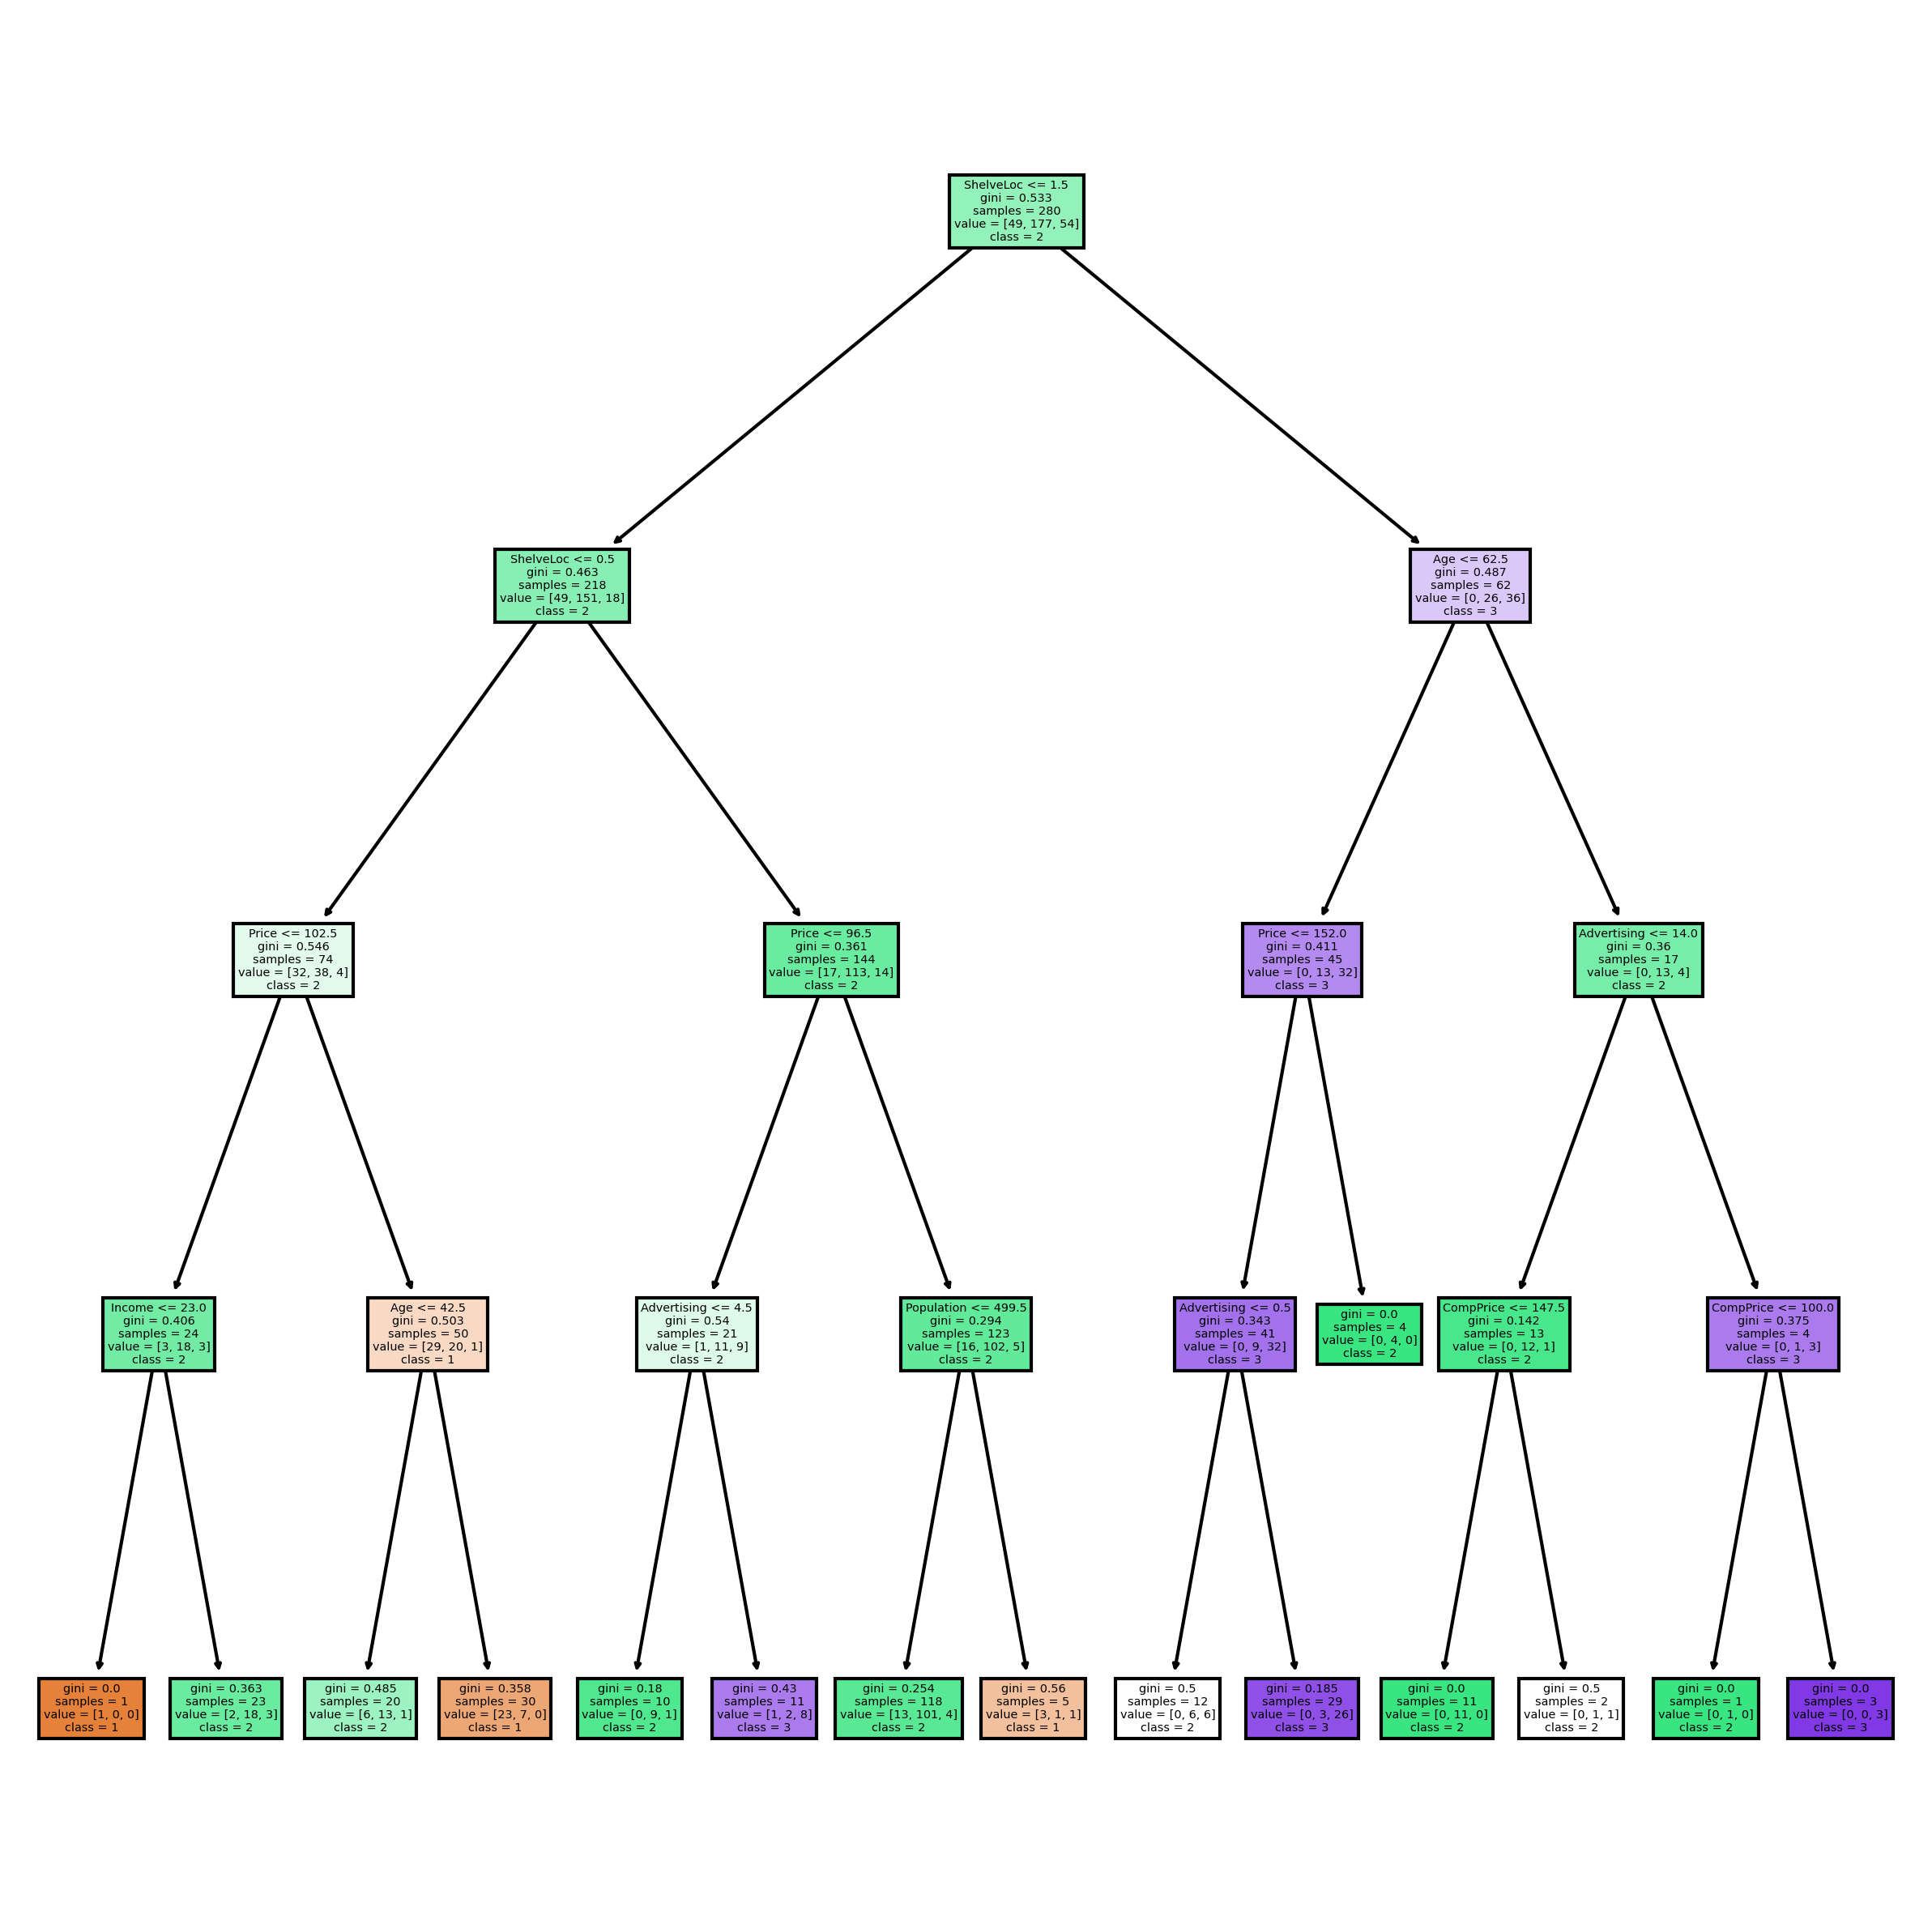

In [108]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)    
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [109]:
y_pred_train_gini= model_gini.predict(x_train)
acc = accuracy_score(y_train, y_pred_train_gini) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train_gini))

Accuracy = 81.42857142857143
[[ 27  21   1]
 [  8 164   5]
 [  1  16  37]]


In [110]:
y_pred_test_gini=model_gini.predict(x_test)
acc=accuracy_score(y_test, y_pred_test_gini)*100
print("Accuracy=", acc)
print(confusion_matrix(y_test, y_pred_test_gini))

Accuracy= 54.166666666666664
[[ 3 25  0]
 [ 4 53 11]
 [ 1 14  9]]


Now for Standardized or Scalled data

In [117]:
stdmodelgini=DecisionTreeClassifier(criterion = 'gini',max_depth=4,max_features='sqrt')
stdmodelgini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

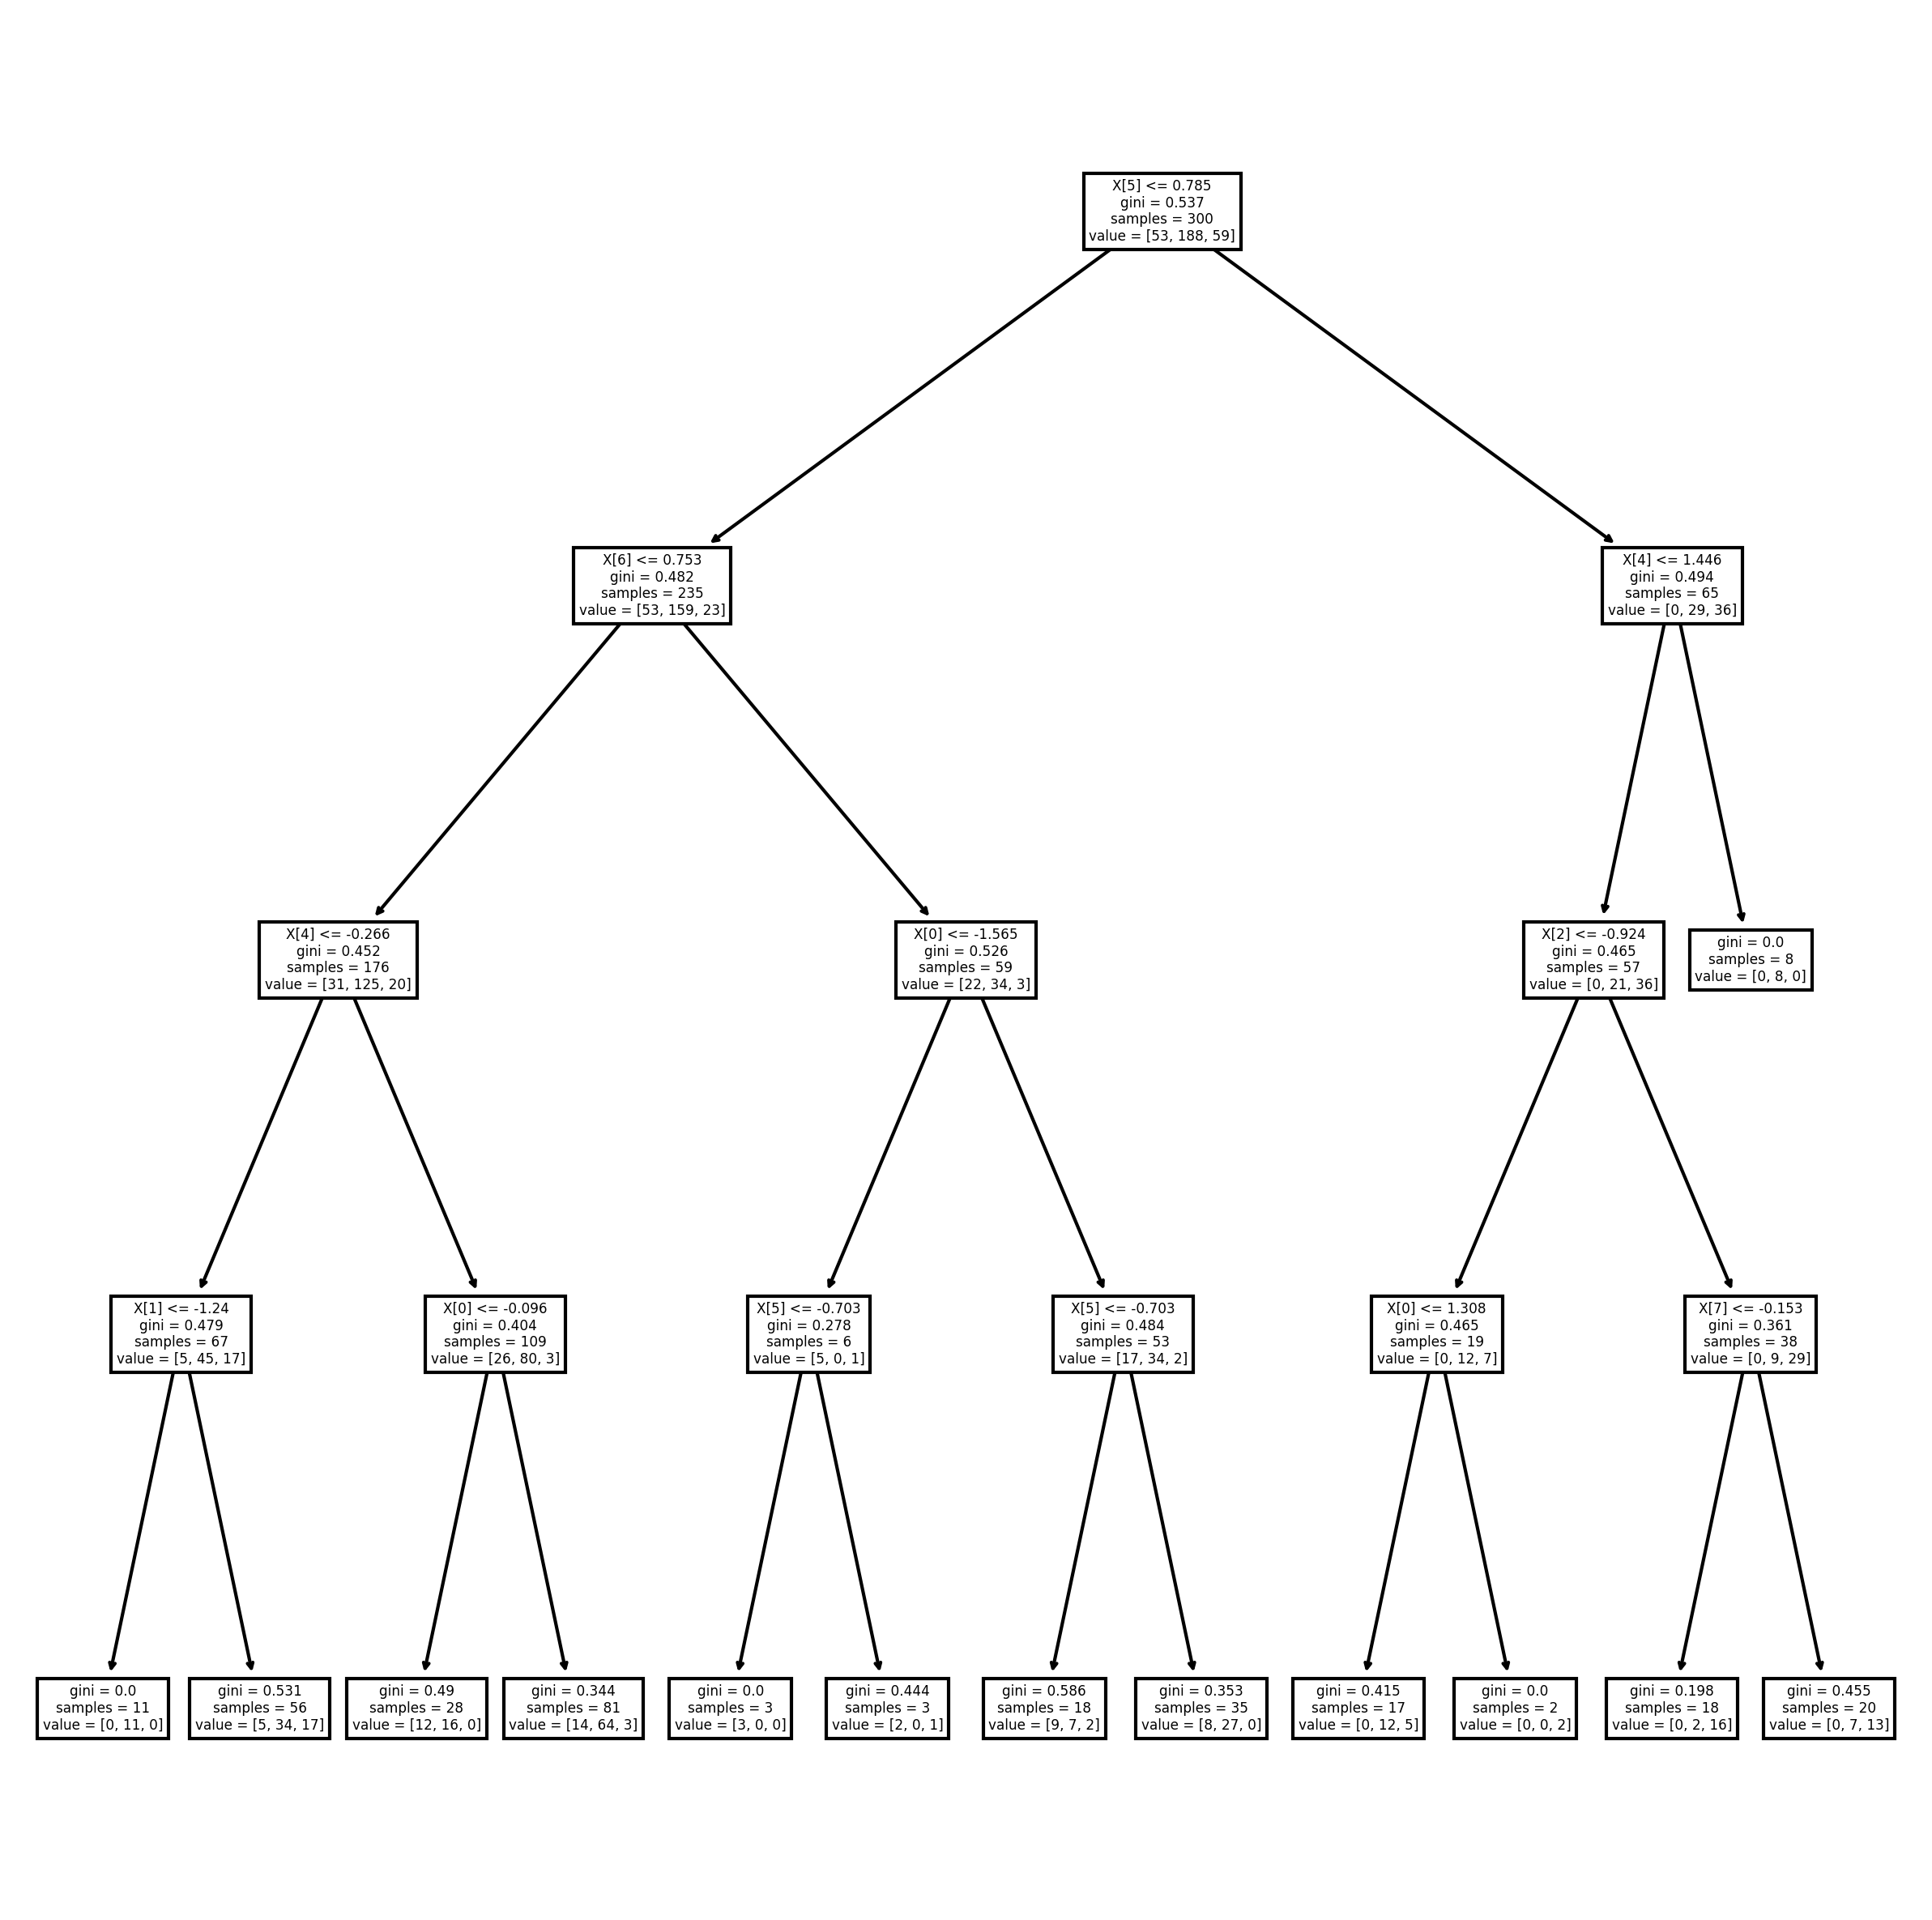

In [118]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(stdmodelgini);

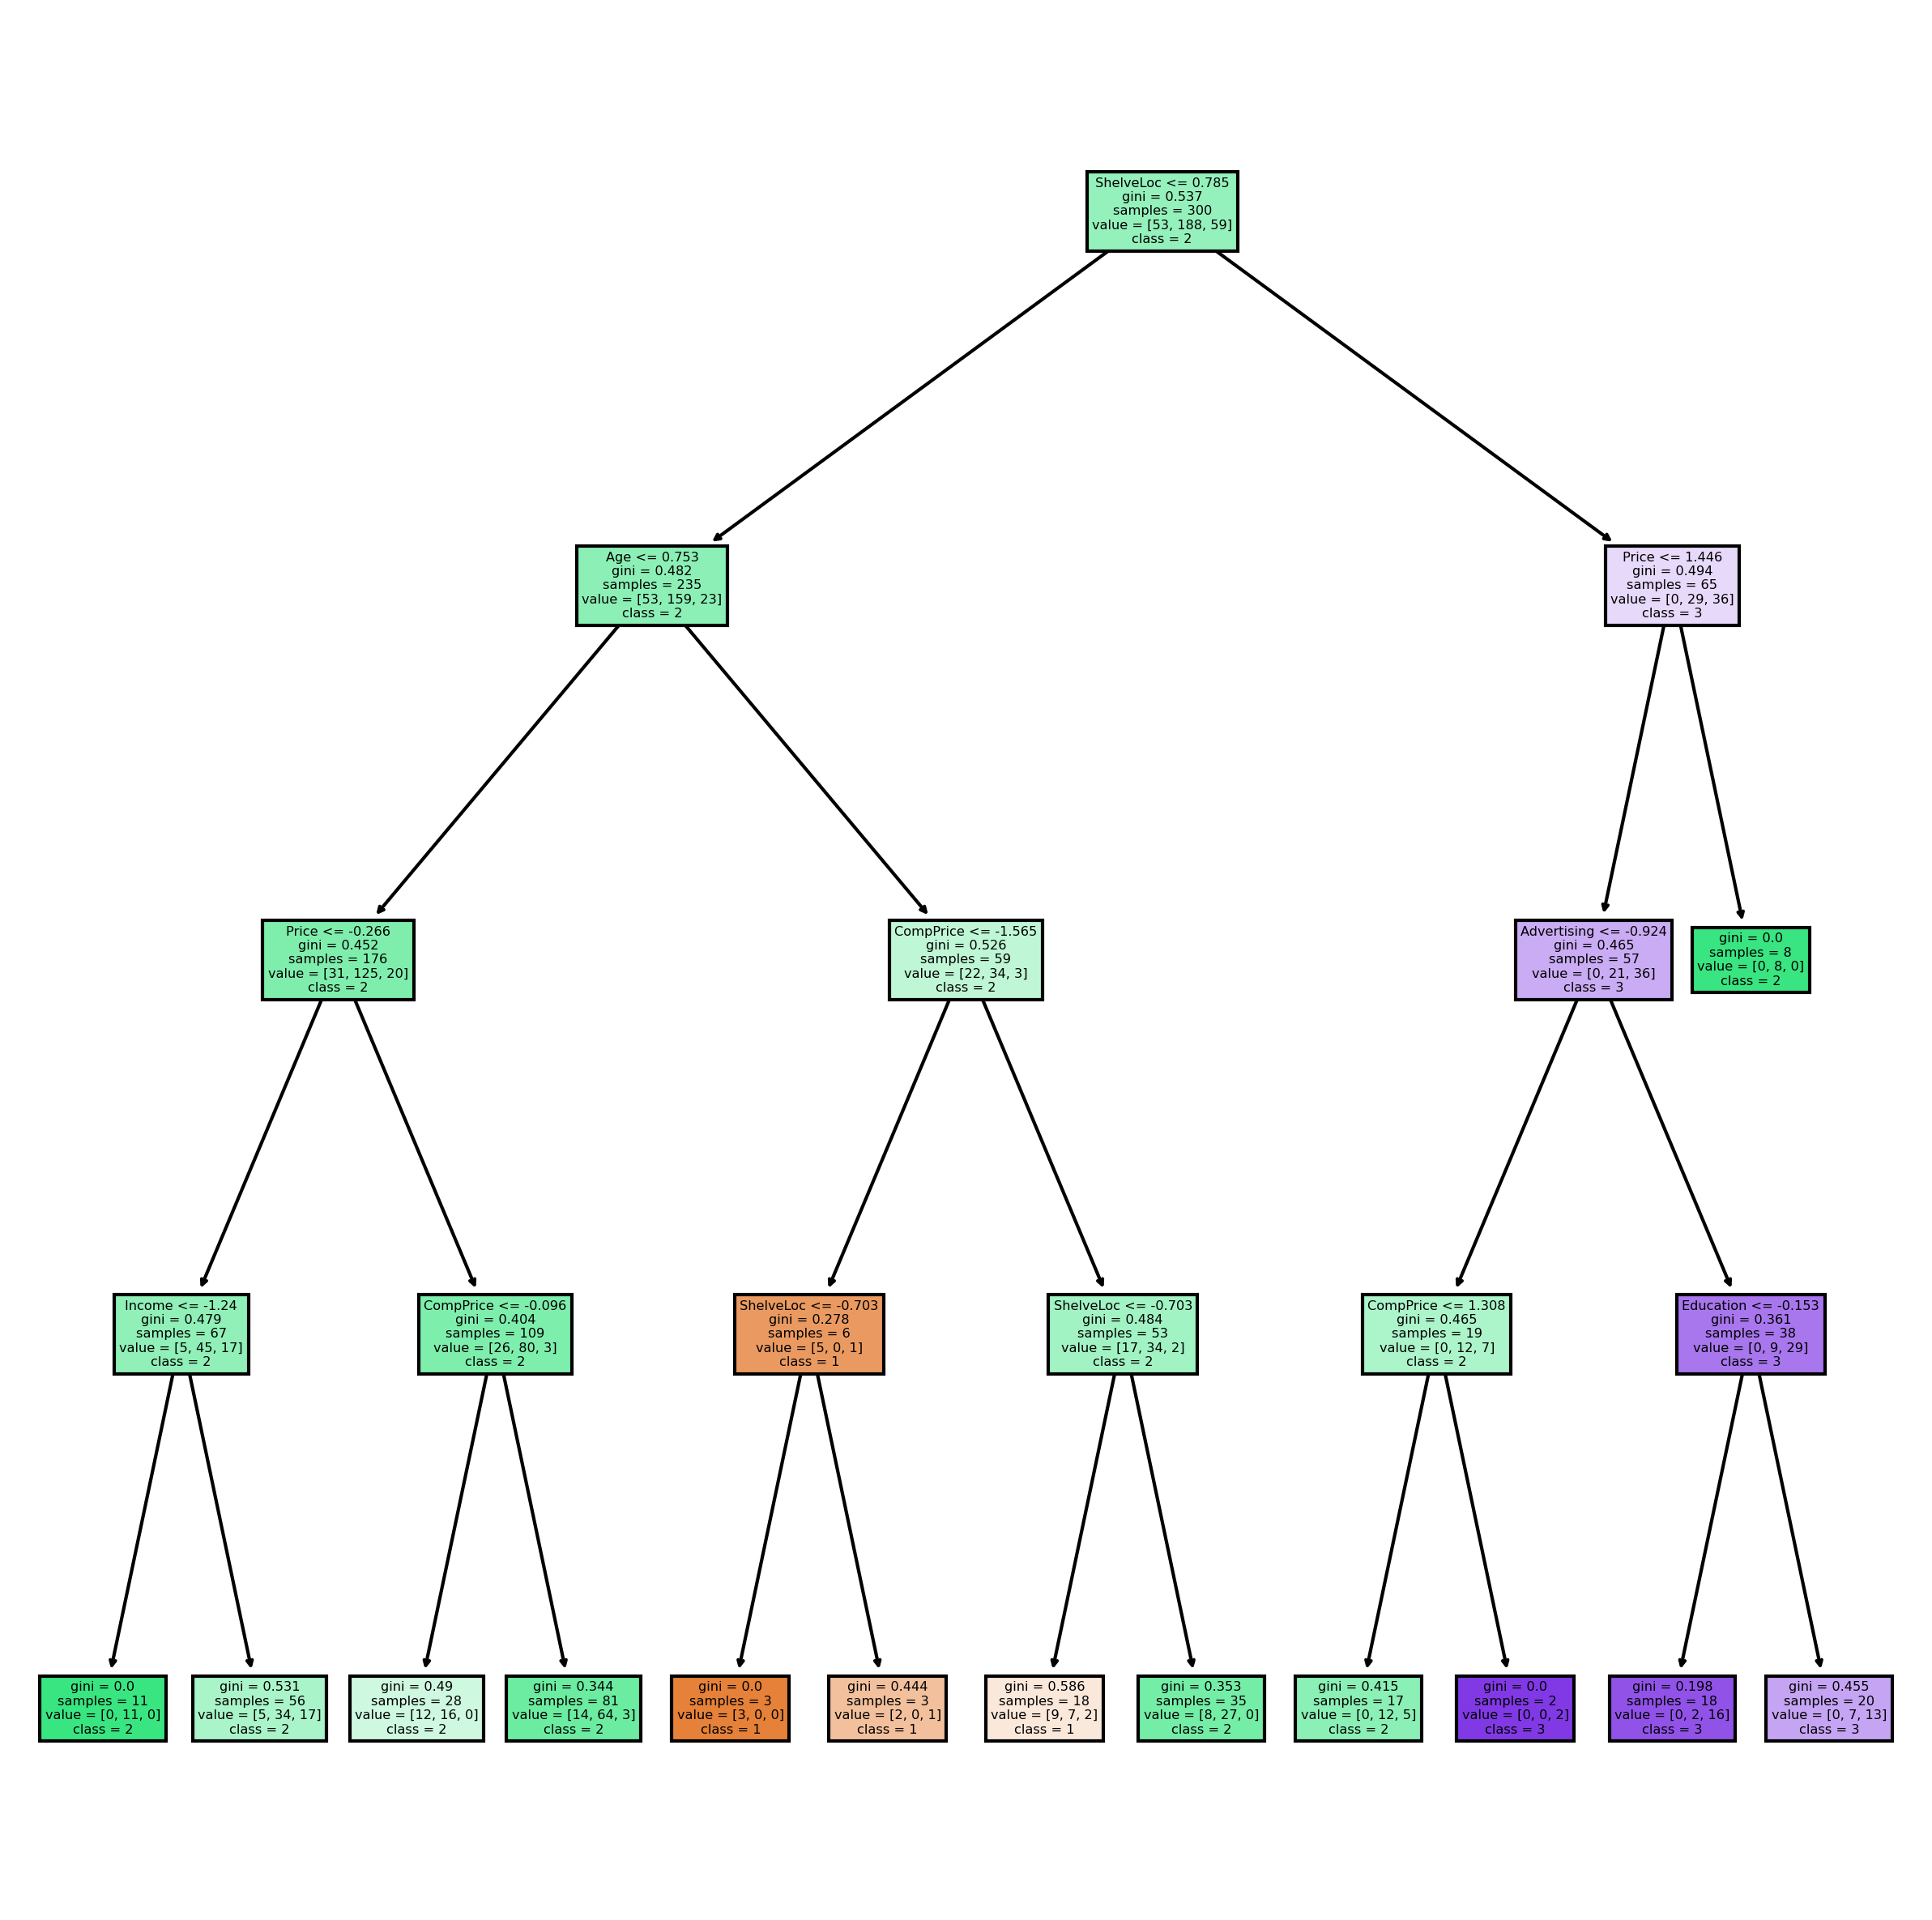

In [119]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)    
tree.plot_tree(stdmodelgini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [120]:
Y_pred_traingini= stdmodelgini.predict(X_train)
acc = accuracy_score(Y_train, Y_pred_traingini) * 100
print("Accuracy =", acc)
print(confusion_matrix(Y_train, Y_pred_traingini))

Accuracy = 72.33333333333334
[[ 14  39   0]
 [  7 172   9]
 [  3  25  31]]


In [121]:
y_pred_testgini=stdmodelgini.predict(x_test)
acc=accuracy_score(y_test, y_pred_testgini)*100
print("Accuracy=", acc)
print(confusion_matrix(y_test, y_pred_testgini))

Accuracy= 56.666666666666664
[[ 0 28  0]
 [ 0 68  0]
 [ 0 24  0]]


# Hence, We got the Accuracy for given dataset by using both Entropy and Gini Criteria are almost Same.